## 1. Carga de librerías necesarias para implementación

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', 30) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Numero máximo de filas a mostar
import numpy as np
np.random.seed(3301)

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D # for 3D plots

# Para preparar los datos
from sklearn.preprocessing import LabelEncoder
# Para crear el arbol de decisión 
from sklearn.tree import DecisionTreeClassifier 
# Para usar KNN como clasificador
from sklearn.neighbors import KNeighborsClassifier
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para evaluar el modelo
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix
# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold 
#Librerías para la visualización
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns 
from sklearn import tree


# Para construir un modelo con el algoritmo de regresión lineal
from sklearn.linear_model import LinearRegression
# Para determinar el rendimiento del modelo con las métricas MSE, MAE y R2
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Para sacar un reporte estadístico que podemos usar para determinar las importancia de las variables explicativas.
import statsmodels.api as sm 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Se cargan los datos. 
df_city=pd.read_csv('clean_city2.csv', sep=';', encoding = 'utf-8', index_col=0)

In [ ]:
df_city.shape

(97, 8)

In [ ]:
df_city.head(20)

,City,State_Province,Country,Continent,Sales_Territory,Region,Subregion,Latest_Recorded_Population
City_Key,,,,,,,,
1,Carrollton,New York,United States,North America,Mideast,Americas,Northern America,22660.408163
2,Carrollton,Virginia,United States,North America,Southeast,Americas,Northern America,4574.000000
3,Carrollton,Illinois,United States,North America,Great Lakes,Americas,Northern America,2484.000000
4,Carrollton,Missouri,United States,North America,Plains,Americas,Northern America,3784.000000
5,Carrollton,Ohio,United States,North America,Great Lakes,Americas,Northern America,3241.000000
6,Carrollton,Kentucky,United States,North America,Southeast,Americas,Northern America,3938.000000
7,Carrollton,Georgia,United States,North America,Southeast,Americas,Northern America,24388.000000
8,Carrollton,Alabama,United States,North America,Southeast,Americas,Northern America,1019.000000
9,Carrollton,Mississippi,United States,North America,Southeast,Americas,Northern America,190.000000


In [ ]:
filename = 'clean_city2.csv'
df_city.to_csv(filename,  sep=';', encoding="utf-8", index=False)


# City

## 1. Cargar los datos

In [ ]:
# Se cargan los datos. 
df_city=pd.read_csv('dimension_city.csv', sep=',', encoding = 'utf-8', index_col=False)

## 2. Perfilamiento y entendimiento de los datos 

In [ ]:
df_city.shape

(98, 10)

Se tienen 2809 filas y 12 variables

In [ ]:
df_city.head(20)

,row ID,City_Key,City,State_Province,Country,Continent,Sales_Territory,Region,Subregion,Latest_Recorded_Population
0,Row0,0,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0
1,Row1,1,Carrollton,New York,United States,North America,Mideast,Americas,Northern America,0
2,Row2,2,Carrollton,Virginia,United States,North America,Southeast,Americas,Northern America,4574
3,Row3,3,Carrollton,Illinois,United States,North America,Great Lakes,Americas,Northern America,2484
4,Row4,4,Carrollton,Missouri,United States,North America,Plains,Americas,Northern America,3784
5,Row5,5,Carrollton,Ohio,United States,North America,Great Lakes,Americas,Northern America,3241
6,Row6,6,Carrollton,Kentucky,United States,North America,Southeast,Americas,Northern America,3938
7,Row7,7,Carrollton,Georgia,United States,North America,Southeast,Americas,Northern America,24388
8,Row8,8,Carrollton,Alabama,United States,North America,Southeast,Americas,Northern America,1019
9,Row9,9,Carrollton,Mississippi,United States,North America,Southeast,Americas,Northern America,190


In [ ]:
# Revisar las características de los datos: completitud y tipo de dato
df_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   row ID                      98 non-null     object
 1   City_Key                    98 non-null     int64 
 2   City                        98 non-null     object
 3   State_Province              97 non-null     object
 4   Country                     97 non-null     object
 5   Continent                   97 non-null     object
 6   Sales_Territory             97 non-null     object
 7   Region                      97 non-null     object
 8   Subregion                   97 non-null     object
 9   Latest_Recorded_Population  98 non-null     int64 
dtypes: int64(2), object(8)
memory usage: 7.8+ KB


Se puede ver todas las ariables, a execepción de ViajesMegocio, Genero, Estado_civil y SobreTiempo ya fueron identificadas como numéricas. Por lo tanto, se deberá hacer una exploración de las variables para ajustar esto. Así mismo, se analizarán las otras variables (categóricas) para identificar anomalías en los datos. Primero, se calculan las ausencias por atributo.

In [ ]:
# Se observa que hay ausencias. 
df_city.isnull().sum()

row ID                        0
City_Key                      0
City                          0
State_Province                1
Country                       1
Continent                     1
Sales_Territory               1
Region                        1
Subregion                     1
Latest_Recorded_Population    0
dtype: int64

### ***Para datos numéricos***

In [ ]:
# Resumen de los estadisticos de las variables numéricas
df_city.describe()

,City_Key,Latest_Recorded_Population
count,98.000000,98.000000
mean,48.500000,22660.408163
std,28.434134,103712.128688
min,0.000000,0.000000
25%,24.250000,2.500000
50%,48.500000,757.500000
75%,72.750000,3939.500000
max,97.000000,790390.000000


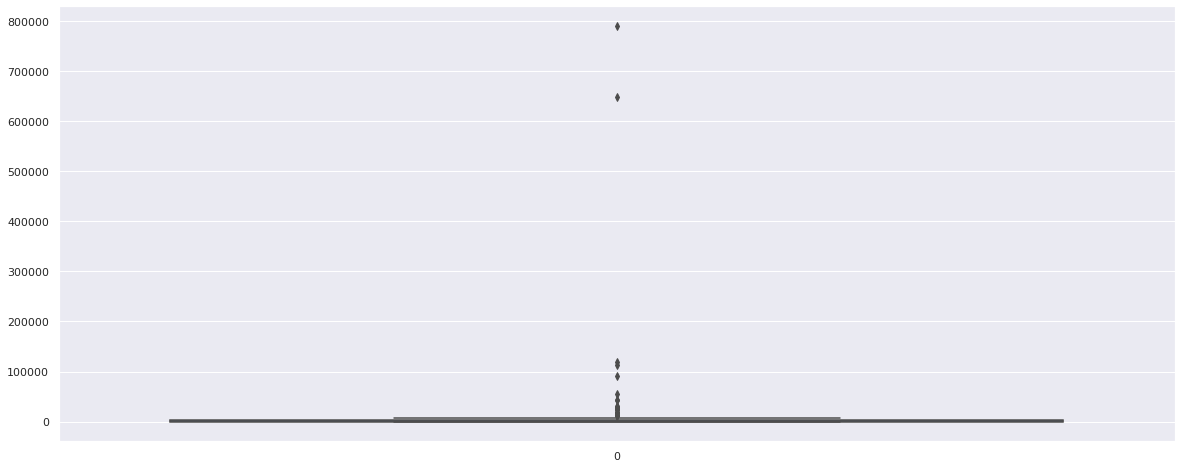

In [ ]:
#Visualización de todas las variables numéricas
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_city['Latest_Recorded_Population'], orient="v")

### ***No numéricas***

In [ ]:
# Explorar las variables que no son numéricas
name_cols_non_number = df_city.select_dtypes(include = ['object']).columns
name_cols_non_number

Index(['row ID', 'City', 'State_Province', 'Country', 'Continent',
       'Sales_Territory', 'Region', 'Subregion'],
      dtype='object')

estas variables se pueden convertir en numéricas más adelante

### Revisaremos los valores que tiene cada columna

In [ ]:
# Lista de nombres de columnas
lista = df_city.columns.tolist()

#Revisar diferentes valores que hay en las columnas para hacer limpieza
for i in lista:
  datos_ver=df_city.groupby([i]).size()
  print(datos_ver)
  print('-'*20)

row ID
Row0     1
Row1     1
Row10    1
Row11    1
Row12    1
        ..
Row93    1
Row94    1
Row95    1
Row96    1
Row97    1
Length: 98, dtype: int64
--------------------
City_Key
0     1
1     1
2     1
3     1
4     1
     ..
93    1
94    1
95    1
96    1
97    1
Length: 98, dtype: int64
--------------------
City
Austerlitz           1
Austin               7
Brown Deer           1
Carrollton          10
Carrollton Manor     1
                    ..
El Verano            1
Elaine               1
Eland                1
Elba                 4
Unknown              1
Length: 59, dtype: int64
--------------------
State_Province
Alabama                        2
Arizona                        1
Arkansas                       4
California                    15
Colorado                       3
Florida                        1
Georgia                        2
Illinois                       3
Indiana                        1
Iowa                           1
Kansas                         1
K

Se decide eliminar la columna SobreTiempo y Horas_Produccion, debido a casi no hay valores No en la primera; y todos los valores son 80 en la segunda. Entonces se entienden como variable constantes que entorpecen al algoritmo

In [ ]:
#Se visualizan todos los valores
atributo = "Latest_Recorded_Population"
df_city[atributo].value_counts().to_frame()

,Latest_Recorded_Population
0,25
190,2
2810,1
1199,1
256,1
...,...
42598,1
3273,1
58,1
10,1


In [ ]:
#Revisar el contenido de las variables que no son numéricas
df_city['Latest_Recorded_Population'].describe()

count        98.000000
mean      22660.408163
std      103712.128688
min           0.000000
25%           2.500000
50%         757.500000
75%        3939.500000
max      790390.000000
Name: Latest_Recorded_Population, dtype: float64

###**Análisis City** 

1. Se observa que la fila 0 tiene casi todos sus valores nulos, por eso se decide eliminarla.
2. La variable Latest_Recorded_Population tiene variuos valores en 0 y menores a 10 que serán reemplazados por la media 

3. row ID es prescindible para la tarea.


Estos análisis nos ayudan a entender el conjunto de datos y a identificar posibles tareas de limpieza que debo realizar antes de generar un modelo.

## 3. Limpieza de datos


In [ ]:
# Es recomendable que todos los pasos de limpieza y preparación se realicen sobre otro archivo.
datos_l_city = df_city.copy()

##### Arreglar datos fuera de rango

In [ ]:
#Reemplzar valores sin sentido en Latest_Recorded_Population por la media 
mean_value=datos_l_city['Latest_Recorded_Population'].mean() 
datos_l_city.loc[datos_l_city.Latest_Recorded_Population<100,'Latest_Recorded_Population']=mean_value

In [ ]:
# Revisar que se realizó el cambio los valores
atributo = "Latest_Recorded_Population"
datos_l_city[atributo].value_counts().to_frame()

,Latest_Recorded_Population
22660.408163,30
190.000000,2
330.000000,1
1478.000000,1
1716.000000,1
...,...
5467.000000,1
3801.000000,1
2706.000000,1
1482.000000,1


##### Identificar datos nulos

In [ ]:
#datos_l.loc[datos_l.new_Genero.isna(), ['Genero_numeric','new_Genero']] 
filas_nulas_city= datos_l_city.loc[datos_l_city.State_Province.isna(), ['City_Key','State_Province'] ]
filas_nulas_city

,City_Key,State_Province
0,0,NaN


In [ ]:
key_city_nula=filas_nulas_city['City_Key'].tolist()[0]
key_city_nula

0

In [ ]:

#Convertir a enteros
datos_l_city['Latest_Recorded_Population']=datos_l_city['Latest_Recorded_Population'].astype(int)
datos_l_city

,City_Key,City,State_Province,Country,Continent,Sales_Territory,Region,Subregion,Latest_Recorded_Population
1,1,Carrollton,New York,United States,North America,Mideast,Americas,Northern America,22660
2,2,Carrollton,Virginia,United States,North America,Southeast,Americas,Northern America,4574
3,3,Carrollton,Illinois,United States,North America,Great Lakes,Americas,Northern America,2484
4,4,Carrollton,Missouri,United States,North America,Plains,Americas,Northern America,3784
5,5,Carrollton,Ohio,United States,North America,Great Lakes,Americas,Northern America,3241
...,...,...,...,...,...,...,...,...,...
93,93,Austin,Texas,United States,North America,Southwest,Americas,Northern America,790390
94,94,Austin,Nevada,United States,North America,Far West,Americas,Northern America,192
95,95,Austin,Arkansas,United States,North America,Southeast,Americas,Northern America,2038
96,96,Austin,Indiana,United States,North America,Great Lakes,Americas,Northern America,4295


##### Eliminar datos

In [ ]:
# Se elimina la fila 0

#datos_l_city.drop(datos_l_city[datos_l_city.State_Province.isna()].index)
datos_l_city = datos_l_city.dropna()
#Se elimina la variable "row ID"
datos_l_city = datos_l_city.drop(['row ID'],axis=1)

datos_l_city.shape

(97, 9)

In [ ]:
datos_l_city.head()

,City_Key,City,State_Province,Country,Continent,Sales_Territory,Region,Subregion,Latest_Recorded_Population
1,1,Carrollton,New York,United States,North America,Mideast,Americas,Northern America,22660
2,2,Carrollton,Virginia,United States,North America,Southeast,Americas,Northern America,4574
3,3,Carrollton,Illinois,United States,North America,Great Lakes,Americas,Northern America,2484
4,4,Carrollton,Missouri,United States,North America,Plains,Americas,Northern America,3784
5,5,Carrollton,Ohio,United States,North America,Great Lakes,Americas,Northern America,3241


In [ ]:
# Se observa que ya no hay ausencias. 
datos_l_city.isnull().sum()

City_Key                      0
City                          0
State_Province                0
Country                       0
Continent                     0
Sales_Territory               0
Region                        0
Subregion                     0
Latest_Recorded_Population    0
dtype: int64

#####Conversión variables decimales a enteros

In [ ]:
#Convertir los valores decimales en Compromiso a enteros
datos_l['Compromiso']=pd.to_numeric(datos_l.Compromiso, errors = 'coerce')
datos_l = datos_l.dropna()
datos_l['Compromiso']=datos_l['Compromiso'].round(0).astype(int)
#datos_ver=datos_l.groupby(["Compromiso"]).size()
#datos_ver
atributo = "Compromiso"
datos_l[atributo].value_counts().to_frame()

,Compromiso
3,2
2,2


In [ ]:
#Convertir los valores decimales en Años_Rol_Actual a enteros
datos_l['Años_Rol_Actual']=pd.to_numeric(datos_l.Años_Rol_Actual, errors = 'coerce')
datos_l = datos_l.dropna()
datos_l['Años_Rol_Actual']=datos_l['Años_Rol_Actual'].round(0).astype(int)
#datos_ver=datos_l.groupby(["Compromiso"]).size()
#datos_ver
atributo = "Años_Rol_Actual"
datos_l[atributo].value_counts().to_frame()

,Años_Rol_Actual
1,1
8,1
3,1
7,1


#####Eliminación datos fuera de rango en variables numéricas

In [ ]:
'''#Eliminaremos las filas que contienen datos fuera de rango en:

#Numero_victimas,  valores  mayores a 15
datos_l = datos_l.drop(datos_l[datos_l['Numero_victimas']>15].index)

#Dia_semana  valores  mayores a 7.
datos_l = datos_l.drop(datos_l[datos_l['Dia_semana']>7].index)

#Limite_velocidad valores mayores a 150 y menores o iguales a 0
datos_l = datos_l.drop(datos_l[datos_l['Limite_velocidad']>150].index)
datos_l = datos_l.drop(datos_l[datos_l['Limite_velocidad']<=0].index)

#Iluminacion valor no válido "0".
datos_l = datos_l.drop(datos_l[datos_l['Iluminacion']=="0"].index)
datos_l.shape
'''

'#Eliminaremos las filas que contienen datos fuera de rango en:\n\n#Numero_victimas,  valores  mayores a 15\ndatos_l = datos_l.drop(datos_l[datos_l[\'Numero_victimas\']>15].index)\n\n#Dia_semana  valores  mayores a 7.\ndatos_l = datos_l.drop(datos_l[datos_l[\'Dia_semana\']>7].index)\n\n#Limite_velocidad valores mayores a 150 y menores o iguales a 0\ndatos_l = datos_l.drop(datos_l[datos_l[\'Limite_velocidad\']>150].index)\ndatos_l = datos_l.drop(datos_l[datos_l[\'Limite_velocidad\']<=0].index)\n\n#Iluminacion valor no válido "0".\ndatos_l = datos_l.drop(datos_l[datos_l[\'Iluminacion\']=="0"].index)\ndatos_l.shape\n'

In [ ]:
#Verificar que los cambios se aplicaron correctamente
# Lista de nombres de columnas
lista = datos_l.columns.tolist()

#Revisar diferentes valores que hay en las columnas para hacer limpieza
for i in lista:
  datos_ver=datos_l[i].value_counts().to_frame()
  print(datos_ver)

    Edad
31     1
40     1
24     1
30     1
            ViajesNegocio
Pocos                   3
Frecuentes              1
    Distancia_casa
3                1
8                1
7                1
15               1
   Satisfacción_ambiente
1                      2
5                      1
3                      1
       Genero
Mujer       3
M           1
   Compromiso
3           2
2           2
   Satisfaccion_trabajo
4                     2
3                     1
1                     1
            Estado_civil
Divorciado             2
Casado                 2
      Ingreso_mensual
2211                1
9958                1
2886                1
7140                1
   Bonos
1      4
    Años_trabajando
2                 1
11                1
6                 1
12                1
    Años_Compañia
3               1
8               1
60              1
7               1
   Años_Rol_Actual
1                1
8                1
3                1
7                1
   Años_Actual

#####Corregir errores de formato en Gender

In [ ]:
# Transformamos  la columnas que contienen datos con errores de formato en floats: Genero

datos_l['new_Genero'] = pd.to_numeric(datos_l.Genero_numeric, errors = 'coerce')
#df_prep['new_PURCHASES_TRX'] = pd.to_numeric(df_prep.PURCHASES_TRX, errors = 'coerce')
#df_prep['new_MINIMUM_PAYMENTS'] = pd.to_numeric(df_prep.MINIMUM_PAYMENTS, errors = 'coerce')
#df_prep['new_TENURE'] = pd.to_numeric(df_prep.TENURE, errors = 'coerce')


#Probaremos primero con new_CASH_ADVANCE
datos_l['new_Genero'].sample(4)

5    NaN
2    0.0
0    0.0
1    0.0
Name: new_Genero, dtype: float64

In [ ]:
# Revisemos los valores que tuvieron problema para su conversión y propongamos opciones de transformación
# Veamos las variables Genero_numeric y new_Genero
datos_l.loc[datos_l.new_Genero.isna(), ['Genero_numeric','new_Genero']] 

,Genero_numeric,new_Genero
5,M,NaN


In [ ]:
# Corregimos, cambiando M por Mujer 
new_Genero_f = datos_l.Genero_numeric[datos_l.new_Genero.isna()]
new_Genero_f = new_Genero_f.apply(lambda s: pd.to_numeric(str(s).replace('M','0')))
datos_l.loc[datos_l.new_Genero.isna(),'new_Genero'] = new_Genero_f 

#Pasar a entero
datos_l['new_Genero']=datos_l['new_Genero'].round(0).astype(int)

# Mirar resultados
datos_l[['Genero_numeric','new_Genero']].sample(4)
#pd.unique(df_prep['new_CASH_ADVANCE'])

,Genero_numeric,new_Genero
1,0,0
5,M,0
0,0,0
2,0,0


## 4. Exportar nuevo csv 

In [ ]:
filename = 'clean_city.csv'
datos_l_city.to_csv(filename,  sep=';', encoding="utf-8")


# Customer

## 1. Cargar los datos

In [ ]:
# Se cargan los datos. 
df_customer=pd.read_csv('dimension_customer.csv', sep=',', encoding = 'unicode_escape', index_col=False)

## 2. Perfilamiento y entendimiento de los datos 

In [ ]:
df_customer.shape

(403, 7)

Se tienen 403 filas y 7 variables

In [ ]:
df_customer.head(20)

,Customer_Key,Customer,Bill_To_Customer,Category,Buying_Group,Primary_Contact,Postal_Code
0,0,Unknown,NaN,NaN,NaN,NaN,NaN
1,1,Tailspin Toys (Head Office),Tailspin Toys (Head Office),Novelty Shop,Tailspin Toys,Waldemar Fisar,90410.0
2,2,Tailspin Toys (Sylvanite- MT),Tailspin Toys (Head Office),Novelty Shop,Tailspin Toys,Lorena Cindric,90216.0
3,3,Tailspin Toys (Peeples Valley- AZ),Tailspin Toys (Head Office),Novelty Shop,Tailspin Toys,Bhaargav Rambhatla,90205.0
4,4,Tailspin Toys (Medicine Lodge- KS),Tailspin Toys (Head Office),Novelty Shop,Tailspin Toys,Daniel Roman,90152.0
5,5,Tailspin Toys (Gasport- NY),Tailspin Toys (Head Office),Novelty Shop,Tailspin Toys,Johanna Huiting,90261.0
6,6,Tailspin Toys (Jessie- ND),Tailspin Toys (Head Office),Novelty Shop,Tailspin Toys,Biswajeet Thakur,90298.0
7,7,Tailspin Toys (Frankewing- TN),Tailspin Toys (Head Office),Novelty Shop,Tailspin Toys,Kalidas Nadar,90761.0
8,8,Tailspin Toys (Bow Mar- CO),Tailspin Toys (Head Office),Novelty Shop,Tailspin Toys,Kanti Kotadia,90484.0
9,9,Tailspin Toys (Netcong- NJ),Tailspin Toys (Head Office),Novelty Shop,Tailspin Toys,Sointu Aalto,90129.0


In [ ]:
# Revisar las características de los datos: completitud y tipo de dato
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_Key      403 non-null    int64  
 1   Customer          403 non-null    object 
 2   Bill_To_Customer  402 non-null    object 
 3   Category          402 non-null    object 
 4   Buying_Group      402 non-null    object 
 5   Primary_Contact   402 non-null    object 
 6   Postal_Code       402 non-null    float64
dtypes: float64(1), int64(1), object(5)
memory usage: 22.2+ KB


Se puede ver casi todas las variables no tienen valores nulos

In [ ]:
# Se observa que hay ausencias. 
df_customer.isnull().sum()

Customer_Key        0
Customer            0
Bill_To_Customer    1
Category            1
Buying_Group        1
Primary_Contact     1
Postal_Code         1
dtype: int64

Habrá que eliminar la fila con esos valores nulos

### ***Para datos numéricos***

In [ ]:
# Resumen de los estadisticos de las variables numéricas
df_customer.describe()

,Customer_Key,Postal_Code
count,403.000000,402.000000
mean,201.000000,90414.390547
std,116.480327,233.078913
min,0.000000,90005.000000
25%,100.500000,90229.750000
50%,201.000000,90400.500000
75%,301.500000,90630.250000
max,402.000000,90800.000000


### ***No numéricas***

In [ ]:
# Explorar las variables que no son numéricas
name_cols_non_number = df_customer.select_dtypes(include = ['object']).columns
name_cols_non_number

Index(['Customer', 'Bill_To_Customer', 'Category', 'Buying_Group',
       'Primary_Contact'],
      dtype='object')

### Revisaremos los valores que tiene cada columna

In [ ]:
# Lista de nombres de columnas
lista = df_customer.columns.tolist()

#Revisar diferentes valores que hay en las columnas para hacer limpieza
for i in lista:
  datos_ver=df_customer.groupby([i]).size()
  print(datos_ver)
  print('-'*20)

Customer_Key
0      1
1      1
2      1
3      1
4      1
      ..
398    1
399    1
400    1
401    1
402    1
Length: 403, dtype: int64
--------------------
Customer
Tailspin Toys (Absecon- NJ)           1
Tailspin Toys (Aceitunas- PR)         1
Tailspin Toys (Airport Drive- MO)     1
Tailspin Toys (Alstead- NH)           1
Tailspin Toys (Amanda Park- WA)       1
                                     ..
Wingtip Toys (West Frostproof- FL)    1
Wingtip Toys (West Hempstead- NY)     1
Wingtip Toys (White Church- MO)       1
Wingtip Toys (Willow Valley- AZ)      1
Wingtip Toys (Yaak- MT)               1
Length: 403, dtype: int64
--------------------
Bill_To_Customer
Tailspin Toys (Head Office)    201
Wingtip Toys (Head Office)     201
dtype: int64
--------------------
Category
Novelty Shop    402
dtype: int64
--------------------
Buying_Group
Tailspin Toys    201
Wingtip Toys     201
dtype: int64
--------------------
Primary_Contact
Aahlada Thota           1
Aakarsha Nookala        1
Aakr

In [ ]:
#Se visualizan todos los valores
atributo = "Primary_Contact"
df_customer[atributo].to_frame()

,Primary_Contact
0,NaN
1,Waldemar Fisar
2,Lorena Cindric
3,Bhaargav Rambhatla
4,Daniel Roman
...,...
398,Bhaamini Kanaparthi
399,Margit Molnar
400,Chandni Jandhyala
401,Ljubomir Nesic


###**Análisis Customer** 

1. Se observa que la fila 0 tiene casi todos sus valores nulos, por eso se decide eliminarla.
2. Postal_Code tiene formato float así que se pasa a entero.

Estos análisis nos ayudan a entender el conjunto de datos y a identificar posibles tareas de limpieza que debo realizar antes de generar un modelo.

## 3. Limpieza de datos


In [ ]:
# Es recomendable que todos los pasos de limpieza y preparación se realicen sobre otro archivo.
datos_l_customer = df_customer.copy()

##### Identificar datos nulos

In [ ]:
#datos_l.loc[datos_l.new_Genero.isna(), ['Genero_numeric','new_Genero']] 
filas_nulas_customer= datos_l_customer.loc[datos_l_customer.Primary_Contact.isna(), ['Customer_Key','Primary_Contact'] ]
filas_nulas_customer

,Customer_Key,Primary_Contact
0,0,NaN


In [ ]:
key_customer_nula=filas_nulas_customer['Customer_Key'].tolist()[0]
key_customer_nula

0

In [ ]:
#Convertir a enteros
datos_l_customer['Postal_Code']=datos_l_customer['Postal_Code'].astype(int)
datos_l_customer

,Customer_Key,Customer,Bill_To_Customer,Category,Buying_Group,Primary_Contact,Postal_Code
1,1,Tailspin Toys (Head Office),Tailspin Toys (Head Office),Novelty Shop,Tailspin Toys,Waldemar Fisar,90410
2,2,Tailspin Toys (Sylvanite- MT),Tailspin Toys (Head Office),Novelty Shop,Tailspin Toys,Lorena Cindric,90216
3,3,Tailspin Toys (Peeples Valley- AZ),Tailspin Toys (Head Office),Novelty Shop,Tailspin Toys,Bhaargav Rambhatla,90205
4,4,Tailspin Toys (Medicine Lodge- KS),Tailspin Toys (Head Office),Novelty Shop,Tailspin Toys,Daniel Roman,90152
5,5,Tailspin Toys (Gasport- NY),Tailspin Toys (Head Office),Novelty Shop,Tailspin Toys,Johanna Huiting,90261
...,...,...,...,...,...,...,...
398,398,Wingtip Toys (Haycock- AK),Wingtip Toys (Head Office),Novelty Shop,Wingtip Toys,Bhaamini Kanaparthi,90603
399,399,Wingtip Toys (Kapa'a- HI),Wingtip Toys (Head Office),Novelty Shop,Wingtip Toys,Margit Molnar,90796
400,400,Wingtip Toys (Dickworsham- TX),Wingtip Toys (Head Office),Novelty Shop,Wingtip Toys,Chandni Jandhyala,90704
401,401,Wingtip Toys (Caro- MI),Wingtip Toys (Head Office),Novelty Shop,Wingtip Toys,Ljubomir Nesic,90043


In [ ]:
# Se elimina la fila 0

#datos_l_city.drop(datos_l_city[datos_l_city.State_Province.isna()].index)
datos_l_customer = datos_l_customer.dropna()

datos_l_customer.shape

(402, 7)

## 4. Exportar nuevo csv 

In [ ]:
filename = 'clean_customer.csv'
datos_l_customer.to_csv(filename,  sep=';', encoding="utf-8")

# Stock

## 1. Cargar los datos

Tocó con unicode_escape porque no reconocía los valores que iniciaban con comas

In [ ]:
df_stock=pd.read_csv('dimension_stock_item.csv', sep=',', encoding = 'unicode_escape', index_col=False)

## 2. Perfilamiento y entendimiento de los datos 

In [ ]:
df_stock=pd.read_csv('clean_stock.csv', sep=';', encoding = 'utf-8', index_col=False)

FileNotFoundError: ignored

In [ ]:
df_stock.shape

(672, 14)

Se tienen 672 filas y 14 variables

In [ ]:
df_stock.head(5)

,Stock_Item_Key,Stock_Item,Color,Selling_Package,Buying_Package,Brand,Size_val,Lead_Time_Days,Quantity_Per_Outer,Is_Chiller_Stock,Tax_Rate,Unit_Price,Recommended_Retail_Price,Typical_Weight_Per_Unit
0,0,Unknown,NaN,NaN,NaN,NaN,NaN,0,0,False,",000",",00",",00",",000"
1,1,Void fill 400 L bag (White) 400L,NaN,Each,Each,NaN,400L,14,10,False,"14,000","50,00","74,75","1,000"
2,2,Void fill 300 L bag (White) 300L,NaN,Each,Each,NaN,300L,14,10,False,"14,000","37,50","56,06",",750"
3,3,Void fill 200 L bag (White) 200L,NaN,Each,Each,NaN,200L,14,10,False,"14,000","25,00","37,38",",500"
4,4,Void fill 100 L bag (White) 100L,NaN,Each,Each,NaN,100L,14,10,False,"14,000","12,50","18,69",",250"


In [ ]:
# Revisar las características de los datos: completitud y tipo de dato
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Stock_Item_Key            672 non-null    int64 
 1   Stock_Item                672 non-null    object
 2   Color                     360 non-null    object
 3   Selling_Package           671 non-null    object
 4   Buying_Package            671 non-null    object
 5   Brand                     67 non-null     object
 6   Size_val                  468 non-null    object
 7   Lead_Time_Days            672 non-null    int64 
 8   Quantity_Per_Outer        672 non-null    int64 
 9   Is_Chiller_Stock          672 non-null    bool  
 10  Tax_Rate                  672 non-null    object
 11  Unit_Price                672 non-null    object
 12  Recommended_Retail_Price  672 non-null    object
 13  Typical_Weight_Per_Unit   672 non-null    object
dtypes: bool(1), int64(3), obje

Se puede ver que hay algunas variables que no tienen ausencias, pero otras bastantes

In [ ]:
# Se observa que hay ausencias. 
df_stock.isnull().sum()

Stock_Item_Key                0
Stock_Item                    0
Color                       312
Selling_Package               1
Buying_Package                1
Brand                       605
Size_val                    204
Lead_Time_Days                0
Quantity_Per_Outer            0
Is_Chiller_Stock              0
Tax_Rate                      0
Unit_Price                    0
Recommended_Retail_Price      0
Typical_Weight_Per_Unit       0
dtype: int64

Las variables Brand y Size_val serán eliminadas por su gran número de ausencias, además no causan problemas de dependencia con otras tablas.

### ***Para datos numéricos***

In [ ]:
# Resumen de los estadisticos de las variables numéricas
df_stock.describe()

,Stock_Item_Key,Lead_Time_Days,Quantity_Per_Outer
count,672.000000,672.000000,672.000000
mean,335.500000,12.318452,7.122024
std,194.133974,2.885766,8.473505
min,0.000000,0.000000,0.000000
25%,167.750000,12.000000,1.000000
50%,335.500000,12.000000,1.000000
75%,503.250000,14.000000,12.000000
max,671.000000,20.000000,36.000000


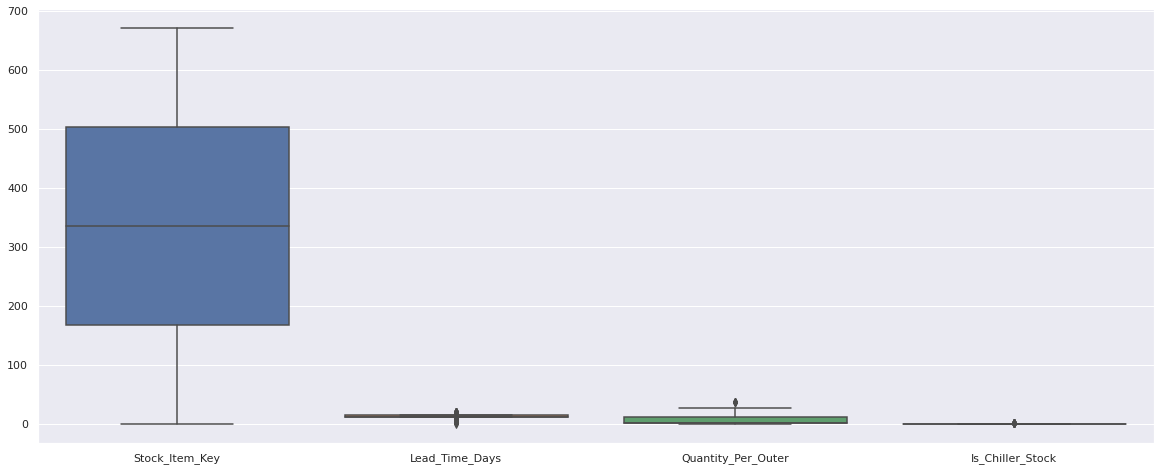

In [ ]:
#Visualización de todas las variables numéricas
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_stock, orient="v")

### ***No numéricas***

In [ ]:
# Explorar las variables que no son numéricas
name_cols_non_number = df_stock.select_dtypes(include = ['object']).columns
name_cols_non_number

Index(['Stock_Item', 'Color', 'Selling_Package', 'Buying_Package', 'Brand',
       'Size_val', 'Tax_Rate', 'Unit_Price', 'Recommended_Retail_Price',
       'Typical_Weight_Per_Unit'],
      dtype='object')

estas variables se pueden convertir en numéricas más adelante

### Revisaremos los valores que tiene cada columna

In [ ]:
# Lista de nombres de columnas
lista = df_stock.columns.tolist()

#Revisar diferentes valores que hay en las columnas para hacer limpieza
for i in lista:
  datos_ver=df_stock.groupby([i]).size()
  print(datos_ver)
  print('-'*20)

Stock_Item_Key
0      1
1      1
2      1
3      1
4      1
      ..
667    1
668    1
669    1
670    1
671    1
Length: 672, dtype: int64
--------------------
Stock_Item
10 mm Anti static bubble wrap (Blue) 10m    3
10 mm Anti static bubble wrap (Blue) 20m    3
10 mm Anti static bubble wrap (Blue) 50m    3
10 mm Double sided bubble wrap 10m          3
10 mm Double sided bubble wrap 20m          3
                                           ..
Void fill 200 L bag (White) 200L            3
Void fill 300 L bag (White) 300L            3
Void fill 400 L bag (White) 400L            3
White chocolate moon rocks 250g             2
White chocolate snow balls 250g             2
Length: 228, dtype: int64
--------------------
Color
Black          143
Blue            59
Gray             9
Light Brown     12
Red             19
Steel Gray      22
White           89
Yellow           7
dtype: int64
--------------------
Selling_Package
Bag        16
Each      630
Packet     17
Pair        8
dtype: int6

Hay errores de formato en Typical_Weight_Per_Unit, Recommended_Retail_Price, Unit_Price y Tax_Rate

In [ ]:
df_stock['Selling_Package'].isnull()

0       True
1      False
2      False
3      False
4      False
       ...  
667    False
668    False
669    False
670    False
671    False
Name: Selling_Package, Length: 672, dtype: bool

In [ ]:
df_stock['Buying_Package'].isnull()

0       True
1      False
2      False
3      False
4      False
       ...  
667    False
668    False
669    False
670    False
671    False
Name: Buying_Package, Length: 672, dtype: bool

Se identifica que la fila de index=0 contiene los valores nulos de Selling_Package, Buying_Package

In [ ]:
#Se visualizan todos los valores
atributo = "Typical_Weight_Per_Unit"
df_stock[atributo].to_frame()

,Typical_Weight_Per_Unit
0,",000"
1,"1,000"
2,",750"
3,",500"
4,",250"
...,...
667,"10,000"
668,",250"
669,",500"
670,",750"


In [ ]:
#Revisar el contenido de las variables que no son numéricas
df_stock['Typical_Weight_Per_Unit'].describe()

count      672
unique      24
top       ,150
freq       126
Name: Typical_Weight_Per_Unit, dtype: object

###**Análisis Stock** 

1. Las variables Brand y Size_val serán eliminadas por su gran número de ausencias, además no causan problemas de dependencia con otras tablas.
2. Hay errores de formato en Typical_Weight_Per_Unit, Recommended_Retail_Price, Unit_Price y Tax_Rate 
  
3. La variable color tiene valores nulos que serán reemplazados de acuerdo a sus valores cercanos.

4. Selling_Package, Buying_Package  tienen un dato nulo respectivamente en la primera fila que será eliminada

5. Reemplazar valores booleanos en Is_Chiller_Stock por 1_True, 0= false y posteriormente cambiarlo a enteros porque sql no lo detecta como un valor booleano.


Estos análisis nos ayudan a entender el conjunto de datos y a identificar posibles tareas de limpieza que debo realizar antes de generar un modelo.

## 3. Limpieza de datos


In [ ]:
# Es recomendable que todos los pasos de limpieza y preparación se realicen sobre otro archivo.
datos_l_stock = df_stock.copy()

##### Identificar key registros con ausencias

In [ ]:
#datos_l.loc[datos_l.new_Genero.isna(), ['Genero_numeric','new_Genero']] 
filas_nulas_stock= datos_l_stock.loc[datos_l_stock.Selling_Package.isna(), ['Stock_Item_Key','Selling_Package', 'Buying_Package'] ]
filas_nulas_stock

,Stock_Item_Key,Selling_Package,Buying_Package
0,0,NaN,NaN


In [ ]:
key_stock_nula=filas_nulas_stock['Stock_Item_Key'].tolist()[0]
key_stock_nula

0

In [ ]:
#Reemplzar valores booleanos en Is_Chiller_Stock por 1_True, 0= false
datos_l_stock.loc[datos_l_stock.Is_Chiller_Stock==True,'Is_Chiller_Stock']=1
datos_l_stock.loc[datos_l_stock.Is_Chiller_Stock==False,'Is_Chiller_Stock']=0
#Convertir a enteros
datos_l_stock['Is_Chiller_Stock']=datos_l_stock['Is_Chiller_Stock'].astype(int)
datos_l_stock.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 671 entries, 1 to 671
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Stock_Item_Key               671 non-null    int64  
 1   Stock_Item                   671 non-null    object 
 2   Color                        671 non-null    object 
 3   Selling_Package              671 non-null    object 
 4   Buying_Package               671 non-null    object 
 5   Lead_Time_Days               671 non-null    int64  
 6   Quantity_Per_Outer           671 non-null    int64  
 7   Is_Chiller_Stock             671 non-null    int64  
 8   Tax_Rate                     671 non-null    float64
 9   Unit_Price                   671 non-null    float64
 10  Recommended_Retail_Price     671 non-null    float64
 11  Typical_Weight_Per_Unit      671 non-null    float64
 12  new_Typical_Weight_Per_Unit  0 non-null      float64
dtypes: float64(5), int64

#####Eliminación de columnas con ausencias y  prescindibles

In [ ]:
# Eliminación registros con ausencias

#se elimina la primera fila que contiene los datos nulos de Selling_Package, Buying_Package
datos_l_stock = datos_l_stock.drop(0)

#Se elimina la variable "Brand", "SobreTiempo" y "Horas_Produccion"
datos_l_stock = datos_l_stock.drop(['Brand', 'Size_val'],axis=1)

datos_l_stock.shape

(671, 12)

##### Reemplazar datos nulos en Color

In [ ]:
#Se reemplazan con los valores cercanos
datos_l_stock["Color"].fillna( method ='ffill', inplace = True) 
datos_l_stock['Color']

1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
      ... 
667    Red
668    Red
669    Red
670    Red
671    Red
Name: Color, Length: 671, dtype: object

In [ ]:
datos_l_stock.isnull().sum()

Stock_Item_Key               0
Stock_Item                   0
Color                       43
Selling_Package              0
Buying_Package               0
Lead_Time_Days               0
Quantity_Per_Outer           0
Is_Chiller_Stock             0
Tax_Rate                     0
Unit_Price                   0
Recommended_Retail_Price     0
Typical_Weight_Per_Unit      0
dtype: int64

Todavía hay registros nulos en Color que serán reemplazados por la moda

In [ ]:
#Se visualizan todos los valores
atributo = "Color"
datos_l_stock[atributo].value_counts().to_frame()

,Color
Black,189
Steel Gray,105
Blue,104
White,101
Red,66
Gray,26
Light Brown,23
Yellow,14


In [ ]:
moda=datos_l_stock['Color'].mode().tolist()[0]
moda

'Black'

In [ ]:
datos_l_stock['Color']=datos_l_stock.Color.fillna(moda)
datos_l_stock['Color']

1      Black
2      Black
3      Black
4      Black
5      Black
       ...  
667      Red
668      Red
669      Red
670      Red
671      Red
Name: Color, Length: 671, dtype: object

In [ ]:
datos_l_stock.isnull().sum()

Stock_Item_Key                   0
Stock_Item                       0
Color                            0
Selling_Package                  0
Buying_Package                   0
Lead_Time_Days                   0
Quantity_Per_Outer               0
Is_Chiller_Stock                 0
Tax_Rate                         0
Unit_Price                       0
Recommended_Retail_Price         0
Typical_Weight_Per_Unit          0
new_Typical_Weight_Per_Unit    671
dtype: int64

Se verifica que ya no hay datos nulos

#####Corregir errores de formato en Typical_Weight_Per_Unit, Recommended_Retail_Price, Unit_Price y Tax_Rate 

In [ ]:
datos_l_stock['Typical_Weight_Per_Unit']

1       1,000
2        ,750
3        ,500
4        ,250
5      10,000
        ...  
667    10,000
668      ,250
669      ,500
670      ,750
671     1,000
Name: Typical_Weight_Per_Unit, Length: 671, dtype: object

In [ ]:
# Corregimos, cambiando , por . 
datos_l_stock['Typical_Weight_Per_Unit'] = datos_l_stock['Typical_Weight_Per_Unit'].apply(lambda s: pd.to_numeric(str(s).replace(',','.')))
datos_l_stock['Recommended_Retail_Price'] = datos_l_stock['Recommended_Retail_Price'].apply(lambda s: pd.to_numeric(str(s).replace(',','.')))
datos_l_stock['Unit_Price'] = datos_l_stock['Unit_Price'].apply(lambda s: pd.to_numeric(str(s).replace(',','.')))
datos_l_stock['Tax_Rate'] = datos_l_stock['Tax_Rate'].apply(lambda s: pd.to_numeric(str(s).replace(',','.')))


In [ ]:
# Lista de nombres de columnas
lista = datos_l_stock.columns.tolist()

#Revisar diferentes valores que hay en las columnas para hacer limpieza
for i in lista:
  datos_ver=datos_l_stock.groupby([i]).size()
  print(datos_ver)
  print('-'*20)

Stock_Item_Key
1      1
2      1
3      1
4      1
5      1
      ..
667    1
668    1
669    1
670    1
671    1
Length: 671, dtype: int64
--------------------
Stock_Item
10 mm Anti static bubble wrap (Blue) 10m    3
10 mm Anti static bubble wrap (Blue) 20m    3
10 mm Anti static bubble wrap (Blue) 50m    3
10 mm Double sided bubble wrap 10m          3
10 mm Double sided bubble wrap 20m          3
                                           ..
Void fill 200 L bag (White) 200L            3
Void fill 300 L bag (White) 300L            3
Void fill 400 L bag (White) 400L            3
White chocolate moon rocks 250g             2
White chocolate snow balls 250g             2
Length: 227, dtype: int64
--------------------
Color
Black          232
Blue           104
Gray            26
Light Brown     23
Red             66
Steel Gray     105
White          101
Yellow          14
dtype: int64
--------------------
Selling_Package
Bag        16
Each      630
Packet     17
Pair        8
dtype: int6

In [ ]:
#Se elimina la variable "new_Typical_Weight_Per_Unit"
datos_l_stock = datos_l_stock.drop(['new_Typical_Weight_Per_Unit'],axis=1)

In [ ]:
datos_l_stock

,Stock_Item_Key,Stock_Item,Color,Selling_Package,Buying_Package,Lead_Time_Days,Quantity_Per_Outer,Is_Chiller_Stock,Tax_Rate,Unit_Price,Recommended_Retail_Price,Typical_Weight_Per_Unit
1,1,Void fill 400 L bag (White) 400L,Black,Each,Each,14,10,0,14.0,50.0,74.75,1.00
2,2,Void fill 300 L bag (White) 300L,Black,Each,Each,14,10,0,14.0,37.5,56.06,0.75
3,3,Void fill 200 L bag (White) 200L,Black,Each,Each,14,10,0,14.0,25.0,37.38,0.50
4,4,Void fill 100 L bag (White) 100L,Black,Each,Each,14,10,0,14.0,12.5,18.69,0.25
5,5,Air cushion machine (Blue),Black,Each,Each,20,1,0,20.0,1899.0,2839.01,10.00
...,...,...,...,...,...,...,...,...,...,...,...,...
667,667,Air cushion machine (Blue),Red,Each,Each,20,1,0,20.0,1899.0,2839.01,10.00
668,668,Void fill 100 L bag (White) 100L,Red,Each,Each,14,10,0,14.0,12.5,18.69,0.25
669,669,Void fill 200 L bag (White) 200L,Red,Each,Each,14,10,0,14.0,25.0,37.38,0.50
670,670,Void fill 300 L bag (White) 300L,Red,Each,Each,14,10,0,14.0,37.5,56.06,0.75


###### Por si es de miles

In [ ]:
# Transformamos  la columnas que contienen datos con errores de formato en floats: Typical_Weight_Per_Unit, Recommended_Retail_Price, Unit_Price y Tax_Rate 

datos_l_stock['new_Typical_Weight_Per_Unit'] = pd.to_numeric(df_stock.Typical_Weight_Per_Unit, errors = 'coerce')
#datos_l_stock['new_PURCHASES_TRX'] = pd.to_numeric(datos_l_stock.PURCHASES_TRX, errors = 'coerce')
#datos_l_stock['new_MINIMUM_PAYMENTS'] = pd.to_numeric(datos_l_stock.MINIMUM_PAYMENTS, errors = 'coerce')
#datos_l_stock['new_TENURE'] = pd.to_numeric(datos_l_stock.TENURE, errors = 'coerce')


#Probaremos primero con new_CASH_ADVANCE
datos_l_stock['new_Typical_Weight_Per_Unit'].to_frame()

,new_Typical_Weight_Per_Unit
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
...,...
667,NaN
668,NaN
669,NaN
670,NaN


In [ ]:
# Revisemos los valores que tuvieron problema para su conversión y propongamos opciones de transformación
# Veamos las variables Genero_numeric y new_Typical_Weight_Per_Unit
datos_l_stock.loc[datos_l_stock.new_Typical_Weight_Per_Unit.isna(), ['Typical_Weight_Per_Unit','new_Typical_Weight_Per_Unit']] 

,Typical_Weight_Per_Unit,new_Typical_Weight_Per_Unit
1,1.00,NaN
2,0.75,NaN
3,0.50,NaN
4,0.25,NaN
5,10.00,NaN
...,...,...
667,10.00,NaN
668,0.25,NaN
669,0.50,NaN
670,0.75,NaN


In [ ]:
# Corregimos, cambiando M por Mujer 
new_Genero_f = datos_l.Genero_numeric[datos_l.new_Genero.isna()]
new_Genero_f = new_Genero_f.apply(lambda s: pd.to_numeric(str(s).replace('M','0')))
datos_l.loc[datos_l.new_Genero.isna(),'new_Genero'] = new_Genero_f 

#Pasar a entero
datos_l['new_Genero']=datos_l['new_Genero'].round(0).astype(int)

# Mirar resultados
datos_l[['Genero_numeric','new_Genero']].sample(4)
#pd.unique(df_prep['new_CASH_ADVANCE'])

NameError: ignored

#####Eliminación datos fuera de rango en variables numéricas

In [ ]:
'''#Eliminaremos las filas que contienen datos fuera de rango en:

#Numero_victimas,  valores  mayores a 15
datos_l = datos_l.drop(datos_l[datos_l['Numero_victimas']>15].index)

#Dia_semana  valores  mayores a 7.
datos_l = datos_l.drop(datos_l[datos_l['Dia_semana']>7].index)

#Limite_velocidad valores mayores a 150 y menores o iguales a 0
datos_l = datos_l.drop(datos_l[datos_l['Limite_velocidad']>150].index)
datos_l = datos_l.drop(datos_l[datos_l['Limite_velocidad']<=0].index)

#Iluminacion valor no válido "0".
datos_l = datos_l.drop(datos_l[datos_l['Iluminacion']=="0"].index)
datos_l.shape
'''

'#Eliminaremos las filas que contienen datos fuera de rango en:\n\n#Numero_victimas,  valores  mayores a 15\ndatos_l = datos_l.drop(datos_l[datos_l[\'Numero_victimas\']>15].index)\n\n#Dia_semana  valores  mayores a 7.\ndatos_l = datos_l.drop(datos_l[datos_l[\'Dia_semana\']>7].index)\n\n#Limite_velocidad valores mayores a 150 y menores o iguales a 0\ndatos_l = datos_l.drop(datos_l[datos_l[\'Limite_velocidad\']>150].index)\ndatos_l = datos_l.drop(datos_l[datos_l[\'Limite_velocidad\']<=0].index)\n\n#Iluminacion valor no válido "0".\ndatos_l = datos_l.drop(datos_l[datos_l[\'Iluminacion\']=="0"].index)\ndatos_l.shape\n'

In [ ]:
#Verificar que los cambios se aplicaron correctamente
# Lista de nombres de columnas
lista = datos_l.columns.tolist()

#Revisar diferentes valores que hay en las columnas para hacer limpieza
for i in lista:
  datos_ver=datos_l[i].value_counts().to_frame()
  print(datos_ver)

NameError: ignored

#####Crear nuevas columnas para convertir las variables tipo object a numéricas

**Explique las tareas de transformación que hizo e justifíquelas.**

Se crearán nuevas columnas para convertir las columnas 'ViajesNegocio', 'Genero', 'Estado_civil' de tipo objetc en numéricas.

**1. ViajesNegocio
*   Pocos=0
*   Frecuentes=1
*   Ninguno=2**
*   Carretera acceso=3
*   Un solo sentido=4

**2. Genero
*   Mujer=0
*   Hombre=1**

*   Oscuridad con luces encendidas=2
*   Oscuridad sin iluminacion=3

**3. Estado_civil
*   Soltero=0
*   Casado =1
*   Divorciado=2**

*   Niebla=3
*   Nieve=4
*   Nieve y ventoso  =5
*   Ventoso=6

4. Condicion_via
*   Con nieve=0
*   Hielo=1
*   Rotonda=2
*   Inundada=3
*   Seca=4


5. Tipo_area
*  Rural=0
*  Urbano=1

6. Severidad_accidente             

*  Fatal=0
*  Leve=1
*  Serio=2




In [ ]:
#Crear nuevas columnas para convertir las columnas 'ViajesNegocio', 'Genero', 'Estado_civil' de tipo objetc en categóricas

#Estado_civil
def numeric_Estado_civil(row):
    if row['Estado_civil'] =="Soltero" :
      return 0
    elif row['Estado_civil'] =="Casado" :
      return 1
    elif row['Estado_civil'] =="Divorciado" :
      return 2
datos_l['Estado_civil_numeric']=datos_l.apply (lambda row: numeric_Estado_civil(row), axis=1)    


#Genero
def numeric_Genero(row):
    if row['Genero'] =="Mujer"   :
      return 0
    elif row['Genero'] =="Hombre" :
      return 0   
    else:
      return row['Genero'] 
datos_l['Genero_numeric']=datos_l.apply (lambda row: numeric_Genero(row), axis=1)    



'''
#Genero
def numeric_Genero(row):
    if row['Genero'] =="Mujer"  or "M" :
      return 0
    elif row['Genero'] =="Hombre" :
      return 0   
datos_l['Genero_numeric']=datos_l.apply (lambda row: numeric_Genero(row), axis=1)    

'''

#ViajesNegocioViajesNegocio
def numeric_ViajesNegocio(row):
    if row['ViajesNegocio'] =="Pocos" :
      return 0
    elif row['ViajesNegocio'] =="Ninguno" :
      return 2
    return 1
datos_l['ViajesNegocio_numeric']=datos_l.apply (lambda row: numeric_ViajesNegocio(row), axis=1)    

'''#Severidad_accidente
def numeric_Severidad_accidente(row):
    if row['Severidad_accidente'] =="Fatal" :
      return 0
    elif row['Severidad_accidente'] =="Leve" :
      return 1
    elif row['Severidad_accidente'] =="Serio" :
      return 2
datos_l['Severidad_accidente_numeric']=datos_l.apply (lambda row: numeric_Severidad_accidente(row), axis=1) 

#Iluminacion
def numeric_Iluminacion(row):
    if row['Iluminacion'] =="Luz_dia" :
      return 0
    elif row['Iluminacion'] =="Oscuridad con luces apagadas" :
      return 1
    elif row['Iluminacion'] =="Oscuridad con luces encendidas" :
      return 2
    elif row['Iluminacion'] =="Oscuridad sin iluminacion" :
      return 3

datos_l['Iluminacion_numeric']=datos_l.apply (lambda row: numeric_Iluminacion(row), axis=1)    

#Clima
def numeric_Clima(row):
    if row['Clima'] =="Bueno" :
      return 0
    elif row['Clima'] =="LLuvioso y ventoso" :
      return 1
    elif row['Clima'] =="Lluvioso" :
      return 2
    elif row['Clima'] =="Niebla" :
      return 3
    elif row['Clima'] =="Nieve" :
      return 4
    elif row['Clima'] =="Nieve y ventoso" :
      return 5
    elif row['Clima'] =="Ventoso" :
      return 6

datos_l['Clima_numeric']=datos_l.apply (lambda row: numeric_Clima(row), axis=1) 

#Condicion_via
def numeric_Condicion_via(row):
    if row['Condicion_via'] =="Con nieve" :
      return 0
    elif row['Condicion_via'] =="Hielo" :
      return 1
    elif row['Condicion_via'] =="Humeda" :
      return 2
    elif row['Condicion_via'] =="Inundada" :
      return 3
    elif row['Condicion_via'] =="Seca" :
      return 4
datos_l['Condicion_via_numeric']=datos_l.apply (lambda row: numeric_Condicion_via(row), axis=1)   ''' 

'#Severidad_accidente\ndef numeric_Severidad_accidente(row):\n    if row[\'Severidad_accidente\'] =="Fatal" :\n      return 0\n    elif row[\'Severidad_accidente\'] =="Leve" :\n      return 1\n    elif row[\'Severidad_accidente\'] =="Serio" :\n      return 2\ndatos_l[\'Severidad_accidente_numeric\']=datos_l.apply (lambda row: numeric_Severidad_accidente(row), axis=1) \n\n#Iluminacion\ndef numeric_Iluminacion(row):\n    if row[\'Iluminacion\'] =="Luz_dia" :\n      return 0\n    elif row[\'Iluminacion\'] =="Oscuridad con luces apagadas" :\n      return 1\n    elif row[\'Iluminacion\'] =="Oscuridad con luces encendidas" :\n      return 2\n    elif row[\'Iluminacion\'] =="Oscuridad sin iluminacion" :\n      return 3\n\ndatos_l[\'Iluminacion_numeric\']=datos_l.apply (lambda row: numeric_Iluminacion(row), axis=1)    \n\n#Clima\ndef numeric_Clima(row):\n    if row[\'Clima\'] =="Bueno" :\n      return 0\n    elif row[\'Clima\'] =="LLuvioso y ventoso" :\n      return 1\n    elif row[\'Clima\'] 

In [ ]:
datos_l.head()

,Edad,ViajesNegocio,Distancia_casa,Satisfacción_ambiente,Genero,Compromiso,Satisfaccion_trabajo,Estado_civil,Ingreso_mensual,Bonos,Años_trabajando,Años_Compañia,Años_Rol_Actual,Años_Actual_Jefe,Estado_civil_numeric,Genero_numeric,ViajesNegocio_numeric
0,31,Pocos,3,1,Mujer,3,4,Divorciado,2211,1,2,3,1,3,2,0,0
1,40,Pocos,8,1,Mujer,2,4,Casado,9958,1,11,8,8,4,1,0,0
2,24,Frecuentes,7,5,Mujer,3,3,Casado,2886,1,6,60,3,2,1,0,1
5,30,Pocos,15,3,M,2,1,Divorciado,7140,1,12,7,7,7,2,M,0


In [ ]:
#Verificar que los cambios se aplicaron correctamente
# Lista de nombres de columnas
lista = datos_l.columns.tolist()

#Revisar diferentes valores que hay en las columnas para hacer limpieza
for i in lista:
  datos_ver=datos_l[i].value_counts().to_frame()
  print(datos_ver)
  print('-'*25)

    Edad
31     1
40     1
24     1
30     1
-------------------------
            ViajesNegocio
Pocos                   3
Frecuentes              1
-------------------------
    Distancia_casa
3                1
8                1
7                1
15               1
-------------------------
   Satisfacción_ambiente
1                      2
5                      1
3                      1
-------------------------
       Genero
Mujer       3
M           1
-------------------------
   Compromiso
3           2
2           2
-------------------------
   Satisfaccion_trabajo
4                     2
3                     1
1                     1
-------------------------
            Estado_civil
Divorciado             2
Casado                 2
-------------------------
      Ingreso_mensual
2211                1
9958                1
2886                1
7140                1
-------------------------
   Bonos
1      4
-------------------------
    Años_trabajando
2                 1

## 4. Exportar nuevo csv 

In [ ]:
filename = 'clean_stock.csv'
datos_l_stock.to_csv(filename,  sep=';', encoding="utf-8")

# Date

## 1. Cargar los datos

In [ ]:
# Se cargan los datos. 
df_date=pd.read_csv('dimension_date.csv', sep=',', encoding = 'utf-8', index_col=False)

## 2. Perfilamiento y entendimiento de los datos 

In [ ]:
df_date.shape

(1461, 9)

Se tienen 1461 filas y 9 variables

In [ ]:
df_date.head(20)

,Date_key,Day_Number,Day_val,Month_val,Short_Month,Calendar_Month_Number,Calendar_Year,Fiscal_Month_Number,Fiscal_Year
0,2013-01-01,1,1,January,Jan,1,2013,3,2013
1,2013-01-02,2,2,January,Jan,1,2013,3,2013
2,2013-01-03,3,3,January,Jan,1,2013,3,2013
3,2013-01-04,4,4,January,Jan,1,2013,3,2013
4,2013-01-05,5,5,January,Jan,1,2013,3,2013
5,2013-01-06,6,6,January,Jan,1,2013,3,2013
6,2013-01-07,7,7,January,Jan,1,2013,3,2013
7,2013-01-08,8,8,January,Jan,1,2013,3,2013
8,2013-01-09,9,9,January,Jan,1,2013,3,2013
9,2013-01-10,10,10,January,Jan,1,2013,3,2013


In [ ]:
# Revisar las características de los datos: completitud y tipo de dato
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Date_key               1461 non-null   object
 1   Day_Number             1461 non-null   int64 
 2   Day_val                1461 non-null   int64 
 3   Month_val              1461 non-null   object
 4   Short_Month            1461 non-null   object
 5   Calendar_Month_Number  1461 non-null   int64 
 6   Calendar_Year          1461 non-null   int64 
 7   Fiscal_Month_Number    1461 non-null   int64 
 8   Fiscal_Year            1461 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 102.9+ KB


No hay valores nulos

In [ ]:
# Se observa que hay ausencias. 
df_date.isnull().sum()

Date_key                 0
Day_Number               0
Day_val                  0
Month_val                0
Short_Month              0
Calendar_Month_Number    0
Calendar_Year            0
Fiscal_Month_Number      0
Fiscal_Year              0
dtype: int64

### ***Para datos numéricos***

In [ ]:
# Resumen de los estadisticos de las variables numéricas
df_date.describe()

,Day_Number,Day_val,Calendar_Month_Number,Calendar_Year,Fiscal_Month_Number,Fiscal_Year
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,15.729637,15.729637,6.522930,2014.501027,6.518823,2014.668036
std,8.803105,8.803105,3.449884,1.118723,3.457247,1.179156
min,1.000000,1.000000,1.000000,2013.000000,1.000000,2013.000000
25%,8.000000,8.000000,4.000000,2014.000000,3.000000,2014.000000
50%,16.000000,16.000000,7.000000,2015.000000,7.000000,2015.000000
75%,23.000000,23.000000,10.000000,2016.000000,10.000000,2016.000000
max,31.000000,31.000000,12.000000,2016.000000,12.000000,2017.000000


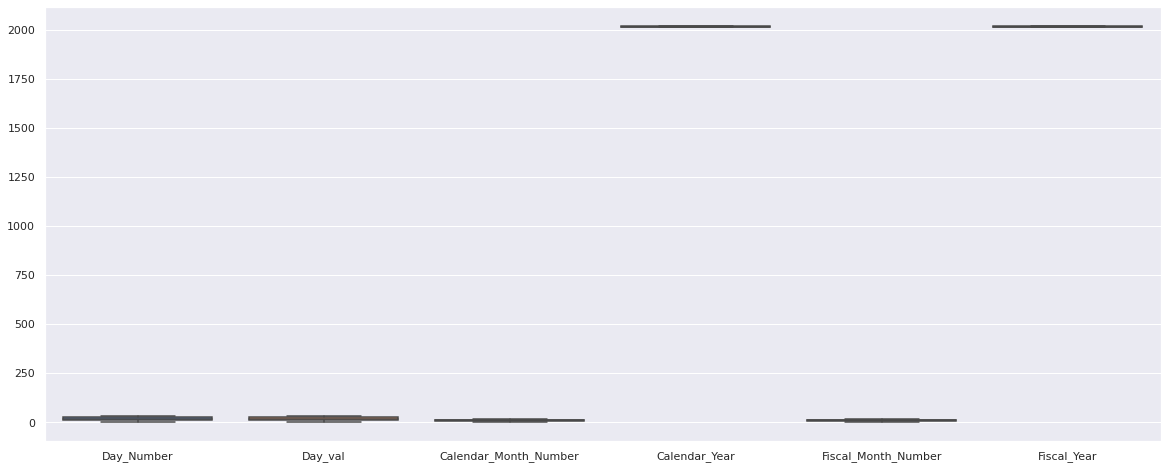

In [ ]:
#Visualización de todas las variables numéricas
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_date, orient="v")

### ***No numéricas***

In [ ]:
# Explorar las variables que no son numéricas
name_cols_non_number = df_date.select_dtypes(include = ['object']).columns
name_cols_non_number

Index(['Date_key', 'Month_val', 'Short_Month'], dtype='object')

estas variables se pueden convertir en numéricas más adelante

### Revisaremos los valores que tiene cada columna

In [ ]:
# Lista de nombres de columnas
lista = df_city.columns.tolist()

#Revisar diferentes valores que hay en las columnas para hacer limpieza
for i in lista:
  datos_ver=df_city.groupby([i]).size()
  print(datos_ver)
  print('-'*20)

City
Austerlitz           1
Austin               7
Brown Deer           1
Carrollton          10
Carrollton Manor     1
                    ..
El Vado              1
El Verano            1
Elaine               1
Eland                1
Elba                 4
Length: 58, dtype: int64
--------------------
State_Province
Alabama                        2
Arizona                        1
Arkansas                       4
California                    15
Colorado                       3
Florida                        1
Georgia                        2
Illinois                       3
Indiana                        1
Iowa                           1
Kansas                         1
Kentucky                       4
Maryland                       3
Michigan                       2
Minnesota                      1
Mississippi                    2
Missouri                       2
Montana                        2
Nebraska                       1
Nevada                         2
New Mexico           

Se decide eliminar la columna SobreTiempo y Horas_Produccion, debido a casi no hay valores No en la primera; y todos los valores son 80 en la segunda. Entonces se entienden como variable constantes que entorpecen al algoritmo

In [ ]:
#Se visualizan todos los valores
atributo = "Latest_Recorded_Population"
df_city[atributo].value_counts().to_frame()

,Latest_Recorded_Population
22660.408163,29
190.000000,2
330.000000,1
1478.000000,1
1716.000000,1
...,...
5467.000000,1
3801.000000,1
2706.000000,1
1482.000000,1


In [ ]:
#Revisar el contenido de las variables que no son numéricas
df_city['Latest_Recorded_Population'].describe()

count        98.000000
mean      22660.408163
std      103712.128688
min           0.000000
25%           2.500000
50%         757.500000
75%        3939.500000
max      790390.000000
Name: Latest_Recorded_Population, dtype: float64

###**Análisis Date** 

1. Se observa que no hay valores nulos
2. Se puede convertir la Date_Key en un valor de tipo fecha




Estos análisis nos ayudan a entender el conjunto de datos y a identificar posibles tareas de limpieza que debo realizar antes de generar un modelo.

## 3. Limpieza de datos


In [ ]:
# Es recomendable que todos los pasos de limpieza y preparación se realicen sobre otro archivo.
datos_l_date = df_date.copy()

##### Convertir Date_Key a tipo datetime

In [ ]:
datos_l_date['new_release_date'] = pd.to_datetime(datos_l_date.Date_key, errors = 'coerce')
datos_l_date['new_release_date'].sample(5)

1331   2016-08-24
506    2014-05-22
723    2014-12-25
785    2015-02-25
1187   2016-04-02
Name: new_release_date, dtype: datetime64[ns]

In [ ]:
datos_l_date.loc[datos_l_date.new_release_date.isna(), ['Date_key','new_release_date']] 

,Date_key,new_release_date


No hay errores de formato en la fecha

In [ ]:
datos_l_date['Date_key'] = pd.to_datetime(datos_l_date.Date_key, errors = 'coerce')
datos_l_date['Date_key'].sample(5)

65    2013-03-07
354   2013-12-21
557   2014-07-12
992   2015-09-20
276   2013-10-04
Name: Date_key, dtype: datetime64[ns]

##### Eliminar datos

In [ ]:
# Se elimina la fila 0

#datos_l_city.drop(datos_l_city[datos_l_city.State_Province.isna()].index)
datos_l_date = datos_l_date.dropna()
#Se elimina la variable "new_release_date" que se creó para verificar el formato de la fecha
datos_l_date = datos_l_date.drop(['new_release_date'],axis=1)

datos_l_date.shape

(1461, 9)

In [ ]:
datos_l_date.head()

,Date_key,Day_Number,Day_val,Month_val,Short_Month,Calendar_Month_Number,Calendar_Year,Fiscal_Month_Number,Fiscal_Year
0,2013-01-01,1,1,January,Jan,1,2013,3,2013
1,2013-01-02,2,2,January,Jan,1,2013,3,2013
2,2013-01-03,3,3,January,Jan,1,2013,3,2013
3,2013-01-04,4,4,January,Jan,1,2013,3,2013
4,2013-01-05,5,5,January,Jan,1,2013,3,2013


In [ ]:
# Se observa que ya no hay ausencias. 
datos_l_date.isnull().sum()

Date_key                 0
Day_Number               0
Day_val                  0
Month_val                0
Short_Month              0
Calendar_Month_Number    0
Calendar_Year            0
Fiscal_Month_Number      0
Fiscal_Year              0
dtype: int64

In [ ]:
datos_l_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1461 entries, 0 to 1460
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date_key               1461 non-null   datetime64[ns]
 1   Day_Number             1461 non-null   int64         
 2   Day_val                1461 non-null   int64         
 3   Month_val              1461 non-null   object        
 4   Short_Month            1461 non-null   object        
 5   Calendar_Month_Number  1461 non-null   int64         
 6   Calendar_Year          1461 non-null   int64         
 7   Fiscal_Month_Number    1461 non-null   int64         
 8   Fiscal_Year            1461 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 114.1+ KB


#####Corregir errores de formato en Gender

In [ ]:
# Transformamos  la columnas que contienen datos con errores de formato en floats: Genero

datos_l['new_Genero'] = pd.to_numeric(datos_l.Genero_numeric, errors = 'coerce')
#df_prep['new_PURCHASES_TRX'] = pd.to_numeric(df_prep.PURCHASES_TRX, errors = 'coerce')
#df_prep['new_MINIMUM_PAYMENTS'] = pd.to_numeric(df_prep.MINIMUM_PAYMENTS, errors = 'coerce')
#df_prep['new_TENURE'] = pd.to_numeric(df_prep.TENURE, errors = 'coerce')


#Probaremos primero con new_CASH_ADVANCE
datos_l['new_Genero'].sample(4)

NameError: ignored

In [ ]:
# Revisemos los valores que tuvieron problema para su conversión y propongamos opciones de transformación
# Veamos las variables Genero_numeric y new_Genero
datos_l.loc[datos_l.new_Genero.isna(), ['Genero_numeric','new_Genero']] 

,Genero_numeric,new_Genero
5,M,NaN


## 4. Exportar nuevo csv 

In [ ]:
filename = 'clean_date.csv'
datos_l_date.to_csv(filename,  sep=';', encoding="utf-8")


In [ ]:
filename = 'clean_date.csv'
df_date.to_csv(filename,  sep=';', encoding="utf-8")


# Employee

## 1. Cargar los datos

In [ ]:
# Se cargan los datos. 
df_employee=pd.read_csv('dimension_employee.csv', sep=',', encoding = 'utf-8', index_col=False)

## 2. Perfilamiento y entendimiento de los datos 

In [ ]:
df_employee.shape

(213, 4)

Se tienen 213 filas y 4 variables

In [ ]:
df_employee.head(20)

,Employee_Key,Employee,Preferred_Name,Is_Salesperson
0,0,Unknown,NaN,False
1,1,Lily Code,Lily,True
2,2,Isabella Rupp,Isabella,False
3,3,Ethan Onslow,Ethan,False
4,4,Amy Trefl,Amy,True
5,5,Jai Shand,Jai,False
6,6,Anthony Grosse,Anthony,True
7,7,Taj Shand,Taj,True
8,8,Hudson Hollinworth,Hudson,True
9,9,Jack Potter,Jack,True


In [ ]:
# Revisar las características de los datos: completitud y tipo de dato
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Employee_Key    213 non-null    int64 
 1   Employee        213 non-null    object
 2   Preferred_Name  212 non-null    object
 3   Is_Salesperson  213 non-null    bool  
dtypes: bool(1), int64(1), object(2)
memory usage: 5.3+ KB


Solo hay una ausencia en la primera fila

In [ ]:
# Se observa que hay ausencias. 
df_employee.isnull().sum()

Employee_Key      0
Employee          0
Preferred_Name    1
Is_Salesperson    0
dtype: int64

### ***Para datos numéricos***

In [ ]:
# Resumen de los estadisticos de las variables numéricas
df_employee.describe()

,Employee_Key
count,213.000000
mean,106.000000
std,61.631972
min,0.000000
25%,53.000000
50%,106.000000
75%,159.000000
max,212.000000


### ***No numéricas***

In [ ]:
# Explorar las variables que no son numéricas
name_cols_non_number = df_employee.select_dtypes(include = ['object']).columns
name_cols_non_number

Index(['Employee', 'Preferred_Name'], dtype='object')

estas variables se pueden convertir en numéricas más adelante

### Revisaremos los valores que tiene cada columna

In [ ]:
# Lista de nombres de columnas
lista = df_employee.columns.tolist()

#Revisar diferentes valores que hay en las columnas para hacer limpieza
for i in lista:
  datos_ver=df_employee.groupby([i]).size()
  print(datos_ver)
  print('-'*20)

Employee_Key
0      1
1      1
2      1
3      1
4      1
      ..
208    1
209    1
210    1
211    1
212    1
Length: 213, dtype: int64
--------------------
Employee
Alica Fatnowna        10
Amy Trefl             14
Anthony Grosse        14
Archer Lamble          3
Ethan Onslow          15
Eva Muirden            3
Henry Forlonge         7
Hudson Hollinworth    15
Hudson Onslow         13
Isabella Rupp          9
Jack Potter           12
Jai Shand             17
Katie Darwin           6
Kayla Woodcock         9
Lily Code             18
Piper Koch            10
Sophia Hinton         11
Stella Rosenhain      12
Taj Shand             14
Unknown                1
dtype: int64
--------------------
Preferred_Name
Alica       10
Amy         14
Anthony     14
Archer       3
Ethan       15
Eva          3
Henry        7
Hudson      28
Isabella     9
Jack        12
Jai         17
Katie        6
Kayla        9
Lily        18
Piper       10
Sophia      11
Stella      12
Taj         14
dtype: int64


In [ ]:
#Se visualizan todos los valores
atributo = "Employee"
df_employee[atributo].value_counts().to_frame()

,Employee
Lily Code,18
Jai Shand,17
Ethan Onslow,15
Hudson Hollinworth,15
Amy Trefl,14
Anthony Grosse,14
Taj Shand,14
Hudson Onslow,13
Jack Potter,12
Stella Rosenhain,12


In [ ]:
#Revisar el contenido de las variables que no son numéricas
df_employee['Employee'].describe()

count           213
unique           20
top       Lily Code
freq             18
Name: Employee, dtype: object

###**Análisis Employee** 

1. Se observa que la fila 0 tiene casi todos sus valores nulos, por eso se decide eliminarla.
2. Se reemplazaron valores booleanos en Is_Salesperson por 1_True, 0= false y posteriormente cambiarlo a enteros porque sql no lo detecta como un valor booleano. 


Estos análisis nos ayudan a entender el conjunto de datos y a identificar posibles tareas de limpieza que debo realizar antes de generar un modelo.

## 3. Limpieza de datos


In [ ]:
# Es recomendable que todos los pasos de limpieza y preparación se realicen sobre otro archivo.
datos_l_employee = df_employee.copy()

##### Código base si corrijo lo de los empleados repetidos 

In [ ]:
#Reemplzar valores booleanos por 1_True, 0= false

datos_l_employee.loc[datos_l_employee.Is_Salesperson==True,'Is_Salesperson']=1
datos_l_employee.loc[datos_l_employee.Is_Salesperson==False,'Is_Salesperson']=0
#Convertir a enteros
datos_l_employee['Is_Salesperson']=datos_l_employee['Is_Salesperson'].astype(int)
datos_l_employee

,Employee_Key,Employee,Preferred_Name,Is_Salesperson
1,1,Lily Code,Lily,1
2,2,Isabella Rupp,Isabella,0
3,3,Ethan Onslow,Ethan,0
4,4,Amy Trefl,Amy,1
5,5,Jai Shand,Jai,0
...,...,...,...,...
208,208,Archer Lamble,Archer,1
209,209,Piper Koch,Piper,0
210,210,Katie Darwin,Katie,0
211,211,Jai Shand,Jai,0


In [ ]:
datos_l_employee.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 1 to 212
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Employee_Key    212 non-null    int64 
 1   Employee        212 non-null    object
 2   Preferred_Name  212 non-null    object
 3   Is_Salesperson  212 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 8.3+ KB


In [ ]:
# Revisar que se realizó el cambio los valores
atributo = "Latest_Recorded_Population"
datos_l_city[atributo].value_counts().to_frame()

,Latest_Recorded_Population
22660.408163,29
190.000000,2
330.000000,1
1478.000000,1
1716.000000,1
...,...
5467.000000,1
3801.000000,1
2706.000000,1
1482.000000,1


##### Identificar datos nulos

In [ ]:
#datos_l.loc[datos_l.new_Genero.isna(), ['Genero_numeric','new_Genero']] 
filas_nulas_employee= datos_l_employee.loc[datos_l_employee.Preferred_Name.isna(), ['Employee_Key','Preferred_Name'] ]
filas_nulas_employee

,Employee_Key,Preferred_Name
0,0,NaN


In [ ]:
key_employee_nula=filas_nulas_employee['Employee_Key'].tolist()[0]
key_employee_nula

0

##### Eliminar datos

In [ ]:
# Se elimina la fila 0

datos_l_employee = datos_l_employee.dropna()
datos_l_employee.drop_duplicates()
datos_l_employee.shape

(212, 4)

In [ ]:
datos_l_employee.head(30)

,Employee_Key,Employee,Preferred_Name,Is_Salesperson
1,1,Lily Code,Lily,True
2,2,Isabella Rupp,Isabella,False
3,3,Ethan Onslow,Ethan,False
4,4,Amy Trefl,Amy,True
5,5,Jai Shand,Jai,False
6,6,Anthony Grosse,Anthony,True
7,7,Taj Shand,Taj,True
8,8,Hudson Hollinworth,Hudson,True
9,9,Jack Potter,Jack,True
10,10,Piper Koch,Piper,False


In [ ]:
# Se observa que ya no hay ausencias. 
datos_l_employee.isnull().sum()

Employee_Key      0
Employee          0
Preferred_Name    0
Is_Salesperson    0
dtype: int64

## 4. Exportar nuevo csv 

In [ ]:
filename = 'clean_employee.csv'
datos_l_employee.to_csv(filename,  sep=';', encoding="utf-8")


# Fact Order

## 2. Cargar los datos

In [ ]:
# Se cargan los datos. 
df_fact=pd.read_csv('fact_order.csv', sep=',', encoding = 'utf-8', index_col=False)

## 3. Perfilamiento y entendimiento de los datos 

In [ ]:
df_fact.shape

(1000, 15)

Se tienen 2809 filas y 12 variables

In [ ]:
df_fact.head(20)

,order_key,city_key,customer_key,stock_item_key,order_date_key,picked_date_key,salesperson_key,picker_key,package,quantity,unit_price,tax_rate,total_excluding_tax,tax_amount,total_including_tax
0,1,91,179,533,2014-02-05,2013-03-17,135,122,S,805,237.77,61,2245.39,305.40,7529.12
1,2,83,2,631,2015-11-17,2013-07-19,2,133,S,76,721.71,59,6585.70,135.12,8442.06
2,3,47,390,174,2015-04-29,2015-11-03,128,75,S,585,2866.71,9,8113.37,792.11,9934.49
3,4,8,218,157,2015-04-04,2014-12-03,84,191,S,878,4671.07,39,9109.56,668.65,6166.09
4,5,94,167,235,2015-01-26,2015-01-11,91,197,S,583,1950.68,24,9277.41,66.55,3885.52
5,6,3,376,124,2014-02-10,2013-06-05,135,181,S,727,775.09,13,3839.04,552.80,5915.45
6,7,10,328,44,2014-02-07,2016-07-29,105,11,S,679,4081.01,37,8618.58,770.80,6790.84
7,8,54,325,629,2013-10-23,2014-07-01,56,56,M,80,1852.75,6,2961.56,871.17,4732.12
8,9,64,263,357,2014-01-29,2015-01-18,184,25,S,777,295.73,41,9975.19,410.59,3029.90
9,10,87,236,607,2015-08-10,2014-06-25,71,200,XL,881,2036.81,22,8045.06,628.18,5774.81


In [ ]:
# Revisar las características de los datos: completitud y tipo de dato
df_fact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order_key            1000 non-null   int64  
 1   city_key             1000 non-null   int64  
 2   customer_key         1000 non-null   int64  
 3   stock_item_key       1000 non-null   int64  
 4   order_date_key       1000 non-null   object 
 5   picked_date_key      1000 non-null   object 
 6   salesperson_key      1000 non-null   int64  
 7   picker_key           1000 non-null   int64  
 8   package              1000 non-null   object 
 9   quantity             1000 non-null   int64  
 10  unit_price           1000 non-null   float64
 11  tax_rate             1000 non-null   int64  
 12  total_excluding_tax  1000 non-null   float64
 13  tax_amount           1000 non-null   float64
 14  total_including_tax  1000 non-null   float64
dtypes: float64(4), int64(8), object(3)
memo

Se puede ver todas las ariables, a execepción de ViajesMegocio, Genero, Estado_civil y SobreTiempo ya fueron identificadas como numéricas. Por lo tanto, se deberá hacer una exploración de las variables para ajustar esto. Así mismo, se analizarán las otras variables (categóricas) para identificar anomalías en los datos. Primero, se calculan las ausencias por atributo.

In [ ]:
# Se observa que hay ausencias. 
df_fact.isnull().sum()

order_key              0
city_key               0
customer_key           0
stock_item_key         0
order_date_key         0
picked_date_key        0
salesperson_key        0
picker_key             0
package                0
quantity               0
unit_price             0
tax_rate               0
total_excluding_tax    0
tax_amount             0
total_including_tax    0
dtype: int64

### ***Para datos numéricos***

In [ ]:
# Resumen de los estadisticos de las variables numéricas
df_fact.describe()

,order_key,city_key,customer_key,stock_item_key,salesperson_key,picker_key,quantity,unit_price,tax_rate,total_excluding_tax,tax_amount,total_including_tax
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,48.813000,192.262000,333.841000,104.873000,110.407000,486.503000,2525.927420,35.455000,5067.421790,504.827390,5149.109840
std,288.819436,27.727222,111.002418,191.029411,60.875896,61.809399,290.902052,1420.203746,20.405155,2870.390154,280.309821,2829.449573
min,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,21.470000,1.000000,116.310000,50.180000,102.530000
25%,250.750000,24.000000,97.000000,175.000000,53.000000,56.000000,226.000000,1293.480000,18.000000,2544.482500,263.245000,2714.900000
50%,500.500000,50.000000,191.000000,336.000000,106.000000,115.000000,489.500000,2517.885000,35.500000,4992.265000,502.310000,5130.270000
75%,750.250000,73.250000,285.000000,502.000000,156.250000,165.000000,743.000000,3671.327500,54.000000,7634.672500,741.485000,7566.692500
max,1000.000000,95.000000,390.000000,660.000000,210.000000,210.000000,998.000000,4990.250000,70.000000,9995.490000,999.380000,9998.900000


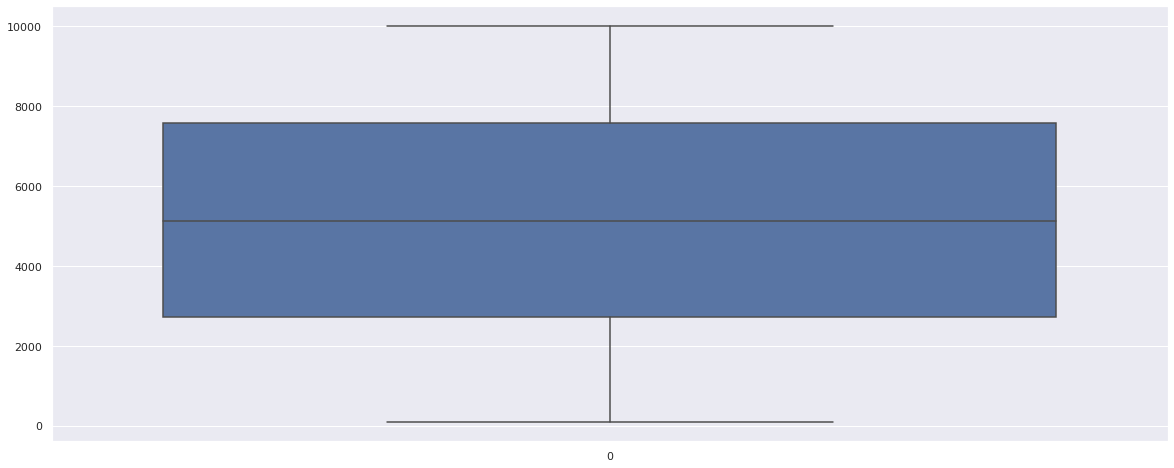

In [ ]:
#Visualización de todas las variables numéricas
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_fact['total_including_tax'], orient="v")

### ***No numéricas***

In [ ]:
# Explorar las variables que no son numéricas
name_cols_non_number = df_fact.select_dtypes(include = ['object']).columns
name_cols_non_number

Index(['order_date_key', 'picked_date_key', 'package'], dtype='object')

estas variables se pueden convertir en numéricas más adelante

### Revisaremos los valores que tiene cada columna

In [ ]:
# Lista de nombres de columnas
lista = df_fact.columns.tolist()

#Revisar diferentes valores que hay en las columnas para hacer limpieza
for i in lista:
  datos_ver=df_fact.groupby([i]).size()
  print(datos_ver)
  print('-'*20)

order_key
1       1
2       1
3       1
4       1
5       1
       ..
996     1
997     1
998     1
999     1
1000    1
Length: 1000, dtype: int64
--------------------
city_key
1     10
2      6
3     15
4     12
5      9
      ..
91     9
92    19
93    11
94     9
95     8
Length: 95, dtype: int64
--------------------
customer_key
1      2
2      3
3      4
4      1
5      1
      ..
386    3
387    3
388    3
389    1
390    2
Length: 355, dtype: int64
--------------------
stock_item_key
2      2
4      5
5      1
6      2
7      3
      ..
655    1
657    3
658    1
659    2
660    1
Length: 524, dtype: int64
--------------------
order_date_key
2013-01-02    2
2013-01-03    1
2013-01-04    1
2013-01-07    1
2013-01-09    1
             ..
2016-12-22    1
2016-12-25    1
2016-12-27    1
2016-12-29    2
2016-12-30    1
Length: 724, dtype: int64
--------------------
picked_date_key
2013-01-02    2
2013-01-07    1
2013-01-12    1
2013-01-15    1
2013-01-16    2
             ..
2016-12-

Se decide eliminar la columna SobreTiempo y Horas_Produccion, debido a casi no hay valores No en la primera; y todos los valores son 80 en la segunda. Entonces se entienden como variable constantes que entorpecen al algoritmo

##  Limpieza de datos


In [ ]:
# Es recomendable que todos los pasos de limpieza y preparación se realicen sobre otro archivo.
datos_l_fact = df_fact.copy()

### **Datos relacionados con city**

In [ ]:
key_city_nula
filas_eliminar= datos_l_fact.loc[datos_l_fact.city_key==key_city_nula, ['order_key','city_key'] ]
filas_eliminar.shape

(0, 2)

In [ ]:
#Ver qué filas de la tabla de hechos dependen de la city_key=0
filas_eliminar= datos_l_fact.loc[datos_l_fact.city_key==key_city_nula, ['order_key','city_key'] ]
filas_eliminar

,order_key,city_key


Se observa que no hay ninguna dependencia de la fila con city_Key =0 de la tabla City

#### ***Localizar filas a eliminar***

In [ ]:
#Localizar filas a eliminar
lll=[0,5,3]
for i in lll:
  filas=filas.append(datos_l_fact.loc[datos_l_fact.city_key==i, ['order_key','city_key'] ]) 

filas

NameError: ignored

#### ***Eliminar filas***

In [ ]:
lll=[0,5,3]
for i in lll:
  indices=datos_l_fact[datos_l_fact["city_key"]==i].index
  datos_l_fact=datos_l_fact.drop(indices)

datos_l_fact.shape

(976, 15)

### **Datos relacionados con Stock**

In [ ]:
key_stock_nula
filas_eliminar= datos_l_fact.loc[datos_l_fact.stock_item_key==key_stock_nula, ['order_key','stock_item_key'] ]
filas_eliminar.shape

(0, 2)

In [ ]:
#Ver qué filas de la tabla de hechos dependen de la city_key=0
filas_eliminar= datos_l_fact.loc[datos_l_fact.stock_item_key==key_stock_nula, ['order_key','stock_item_key'] ]
filas_eliminar

,order_key,stock_item_key


Se observa que no hay ninguna dependencia de la fila con stock_item_key =0 de la tabla Stock

### **Datos relacionados con Customer**

In [ ]:
key_customer_nula
filas_eliminar= datos_l_fact.loc[datos_l_fact.customer_key==key_customer_nula, ['order_key','customer_key'] ]
filas_eliminar.shape

(0, 2)

In [ ]:
#Ver qué filas de la tabla de hechos dependen de la city_key=0
filas_eliminar= datos_l_fact.loc[datos_l_fact.customer_key==key_customer_nula, ['order_key','customer_key'] ]
filas_eliminar

,order_key,customer_key


Se observa que no hay ninguna dependencia de la fila con customer_key =0 de la tabla Stock

### **Datos relacionados con Date**

##### Convertir order_date_key, picked_date_key a tipo datetime

In [ ]:
datos_l_fact['new_order_date_key'] = pd.to_datetime(datos_l_fact.order_date_key, errors = 'coerce')
datos_l_fact['new_picked_date_key'] = pd.to_datetime(datos_l_fact.picked_date_key, errors = 'coerce')
datos_l_fact['new_order_date_key'].sample(5)

110   2013-03-10
351   2015-06-24
901   2015-02-07
992   2015-08-10
165   2016-12-27
Name: new_order_date_key, dtype: datetime64[ns]

In [ ]:
datos_l_fact.isnull().sum()

order_key              0
city_key               0
customer_key           0
stock_item_key         0
order_date_key         0
picked_date_key        0
salesperson_key        0
picker_key             0
package                0
quantity               0
unit_price             0
tax_rate               0
total_excluding_tax    0
tax_amount             0
total_including_tax    0
new_order_date_key     0
new_picked_date_key    0
dtype: int64

No hay errores de formato en la fecha

In [ ]:
datos_l_fact['order_date_key'] = pd.to_datetime(datos_l_fact.order_date_key, errors = 'coerce')
datos_l_fact['picked_date_key'] = pd.to_datetime(datos_l_fact.picked_date_key, errors = 'coerce')
datos_l_fact.sample(5)

,order_key,city_key,customer_key,stock_item_key,order_date_key,picked_date_key,salesperson_key,picker_key,package,quantity,unit_price,tax_rate,total_excluding_tax,tax_amount,total_including_tax,new_order_date_key,new_picked_date_key
351,352,83,200,466,2015-06-24,2014-04-04,129,210,M,742,2972.86,56,2922.91,873.56,6584.87,2015-06-24,2014-04-04
116,117,75,174,179,2013-12-31,2015-12-18,19,189,S,851,4279.25,21,8257.17,653.71,4094.00,2013-12-31,2015-12-18
839,840,65,225,403,2015-04-30,2015-03-28,50,138,S,15,43.80,35,9404.58,636.01,4207.28,2015-04-30,2015-03-28
801,802,9,195,386,2016-07-26,2014-08-17,207,4,S,776,101.80,33,4811.50,858.63,4973.41,2016-07-26,2014-08-17
559,560,84,85,552,2013-11-21,2014-10-11,179,87,M,384,3739.89,2,167.69,720.33,8338.51,2013-11-21,2014-10-11


In [ ]:
# Eliminación registros con ausencias
datos_l_fact = datos_l_fact.dropna()

#Se elimina la variable "new_order_date_key", "new_picked_date_key" que se crearon para comporbar que la fecha se convirtió correctamente
datos_l_fact = datos_l_fact.drop(['new_order_date_key', 'new_picked_date_key'],axis=1)

datos_l_fact.shape

(1000, 15)

In [ ]:
datos_l_fact.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   order_key            1000 non-null   int64         
 1   city_key             1000 non-null   int64         
 2   customer_key         1000 non-null   int64         
 3   stock_item_key       1000 non-null   int64         
 4   order_date_key       1000 non-null   datetime64[ns]
 5   picked_date_key      1000 non-null   datetime64[ns]
 6   salesperson_key      1000 non-null   int64         
 7   picker_key           1000 non-null   int64         
 8   package              1000 non-null   object        
 9   quantity             1000 non-null   int64         
 10  unit_price           1000 non-null   float64       
 11  tax_rate             1000 non-null   int64         
 12  total_excluding_tax  1000 non-null   float64       
 13  tax_amount           1000 non-null

### **Datos relacionados con Employee**

In [ ]:
#salesperson_key	picker_key	
key_employee_nula
filas_eliminar= datos_l_fact.loc[datos_l_fact.salesperson_key==key_customer_nula, ['order_key','salesperson_key'] ]
filas_eliminar.shape

(0, 2)

In [ ]:
key_employee_nula
filas_eliminar= datos_l_fact.loc[datos_l_fact.picker_key==key_customer_nula, ['order_key','picker_key'] ]
filas_eliminar.shape

(0, 2)

In [ ]:
#Ver qué filas de la tabla de hechos dependen de la city_key=0
filas_eliminar= datos_l_fact.loc[datos_l_fact.picker_key==key_customer_nula, ['order_key','picker_key'] ]
filas_eliminar

,order_key,picker_key


Se observa que no hay ninguna dependencia de la fila con picker_key, o salesperson_key  =0 de la tabla Employee

## 4. Exportar nuevo csv 

Exportar tabla de hechos con las fechas en formato date

In [ ]:
filename = 'clean_fact.csv'
datos_l_fact.to_csv(filename,  sep=';', encoding="utf-8")


In [ ]:
filename = 'clean_fact.csv'
df_fact.to_csv(filename,  sep=';', encoding="utf-8")

### Continuar limpieza

In [ ]:
# Revisar que se realizó el cambio los valores
atributo = "Latest_Recorded_Population"
datos_l_city[atributo].value_counts().to_frame()

,Latest_Recorded_Population
22660.408163,30
190.000000,2
330.000000,1
1478.000000,1
1716.000000,1
...,...
5467.000000,1
3801.000000,1
2706.000000,1
1482.000000,1


#####Conversión variables decimales a enteros

In [ ]:
#Convertir los valores decimales en Compromiso a enteros
datos_l['Compromiso']=pd.to_numeric(datos_l.Compromiso, errors = 'coerce')
datos_l = datos_l.dropna()
datos_l['Compromiso']=datos_l['Compromiso'].round(0).astype(int)
#datos_ver=datos_l.groupby(["Compromiso"]).size()
#datos_ver
atributo = "Compromiso"
datos_l[atributo].value_counts().to_frame()

,Compromiso
3,2
2,2


In [ ]:
#Convertir los valores decimales en Años_Rol_Actual a enteros
datos_l['Años_Rol_Actual']=pd.to_numeric(datos_l.Años_Rol_Actual, errors = 'coerce')
datos_l = datos_l.dropna()
datos_l['Años_Rol_Actual']=datos_l['Años_Rol_Actual'].round(0).astype(int)
#datos_ver=datos_l.groupby(["Compromiso"]).size()
#datos_ver
atributo = "Años_Rol_Actual"
datos_l[atributo].value_counts().to_frame()

,Años_Rol_Actual
1,1
8,1
3,1
7,1


#####Eliminación datos fuera de rango en variables numéricas

In [ ]:
'''#Eliminaremos las filas que contienen datos fuera de rango en:

#Numero_victimas,  valores  mayores a 15
datos_l = datos_l.drop(datos_l[datos_l['Numero_victimas']>15].index)

#Dia_semana  valores  mayores a 7.
datos_l = datos_l.drop(datos_l[datos_l['Dia_semana']>7].index)

#Limite_velocidad valores mayores a 150 y menores o iguales a 0
datos_l = datos_l.drop(datos_l[datos_l['Limite_velocidad']>150].index)
datos_l = datos_l.drop(datos_l[datos_l['Limite_velocidad']<=0].index)

#Iluminacion valor no válido "0".
datos_l = datos_l.drop(datos_l[datos_l['Iluminacion']=="0"].index)
datos_l.shape
'''

'#Eliminaremos las filas que contienen datos fuera de rango en:\n\n#Numero_victimas,  valores  mayores a 15\ndatos_l = datos_l.drop(datos_l[datos_l[\'Numero_victimas\']>15].index)\n\n#Dia_semana  valores  mayores a 7.\ndatos_l = datos_l.drop(datos_l[datos_l[\'Dia_semana\']>7].index)\n\n#Limite_velocidad valores mayores a 150 y menores o iguales a 0\ndatos_l = datos_l.drop(datos_l[datos_l[\'Limite_velocidad\']>150].index)\ndatos_l = datos_l.drop(datos_l[datos_l[\'Limite_velocidad\']<=0].index)\n\n#Iluminacion valor no válido "0".\ndatos_l = datos_l.drop(datos_l[datos_l[\'Iluminacion\']=="0"].index)\ndatos_l.shape\n'

In [ ]:
#Verificar que los cambios se aplicaron correctamente
# Lista de nombres de columnas
lista = datos_l.columns.tolist()

#Revisar diferentes valores que hay en las columnas para hacer limpieza
for i in lista:
  datos_ver=datos_l[i].value_counts().to_frame()
  print(datos_ver)

    Edad
31     1
40     1
24     1
30     1
            ViajesNegocio
Pocos                   3
Frecuentes              1
    Distancia_casa
3                1
8                1
7                1
15               1
   Satisfacción_ambiente
1                      2
5                      1
3                      1
       Genero
Mujer       3
M           1
   Compromiso
3           2
2           2
   Satisfaccion_trabajo
4                     2
3                     1
1                     1
            Estado_civil
Divorciado             2
Casado                 2
      Ingreso_mensual
2211                1
9958                1
2886                1
7140                1
   Bonos
1      4
    Años_trabajando
2                 1
11                1
6                 1
12                1
    Años_Compañia
3               1
8               1
60              1
7               1
   Años_Rol_Actual
1                1
8                1
3                1
7                1
   Años_Actual

#####Crear nuevas columnas para convertir las variables tipo object a numéricas

**Explique las tareas de transformación que hizo e justifíquelas.**

Se crearán nuevas columnas para convertir las columnas 'ViajesNegocio', 'Genero', 'Estado_civil' de tipo objetc en numéricas.

**1. ViajesNegocio
*   Pocos=0
*   Frecuentes=1
*   Ninguno=2**
*   Carretera acceso=3
*   Un solo sentido=4

**2. Genero
*   Mujer=0
*   Hombre=1**

*   Oscuridad con luces encendidas=2
*   Oscuridad sin iluminacion=3

**3. Estado_civil
*   Soltero=0
*   Casado =1
*   Divorciado=2**

*   Niebla=3
*   Nieve=4
*   Nieve y ventoso  =5
*   Ventoso=6

4. Condicion_via
*   Con nieve=0
*   Hielo=1
*   Rotonda=2
*   Inundada=3
*   Seca=4


5. Tipo_area
*  Rural=0
*  Urbano=1

6. Severidad_accidente             

*  Fatal=0
*  Leve=1
*  Serio=2




In [ ]:
#Crear nuevas columnas para convertir las columnas 'ViajesNegocio', 'Genero', 'Estado_civil' de tipo objetc en categóricas

#Estado_civil
def numeric_Estado_civil(row):
    if row['Estado_civil'] =="Soltero" :
      return 0
    elif row['Estado_civil'] =="Casado" :
      return 1
    elif row['Estado_civil'] =="Divorciado" :
      return 2
datos_l['Estado_civil_numeric']=datos_l.apply (lambda row: numeric_Estado_civil(row), axis=1)    


#Genero
def numeric_Genero(row):
    if row['Genero'] =="Mujer"   :
      return 0
    elif row['Genero'] =="Hombre" :
      return 0   
    else:
      return row['Genero'] 
datos_l['Genero_numeric']=datos_l.apply (lambda row: numeric_Genero(row), axis=1)    



'''
#Genero
def numeric_Genero(row):
    if row['Genero'] =="Mujer"  or "M" :
      return 0
    elif row['Genero'] =="Hombre" :
      return 0   
datos_l['Genero_numeric']=datos_l.apply (lambda row: numeric_Genero(row), axis=1)    

'''

#ViajesNegocioViajesNegocio
def numeric_ViajesNegocio(row):
    if row['ViajesNegocio'] =="Pocos" :
      return 0
    elif row['ViajesNegocio'] =="Ninguno" :
      return 2
    return 1
datos_l['ViajesNegocio_numeric']=datos_l.apply (lambda row: numeric_ViajesNegocio(row), axis=1)    

'''#Severidad_accidente
def numeric_Severidad_accidente(row):
    if row['Severidad_accidente'] =="Fatal" :
      return 0
    elif row['Severidad_accidente'] =="Leve" :
      return 1
    elif row['Severidad_accidente'] =="Serio" :
      return 2
datos_l['Severidad_accidente_numeric']=datos_l.apply (lambda row: numeric_Severidad_accidente(row), axis=1) 

#Iluminacion
def numeric_Iluminacion(row):
    if row['Iluminacion'] =="Luz_dia" :
      return 0
    elif row['Iluminacion'] =="Oscuridad con luces apagadas" :
      return 1
    elif row['Iluminacion'] =="Oscuridad con luces encendidas" :
      return 2
    elif row['Iluminacion'] =="Oscuridad sin iluminacion" :
      return 3

datos_l['Iluminacion_numeric']=datos_l.apply (lambda row: numeric_Iluminacion(row), axis=1)    

#Clima
def numeric_Clima(row):
    if row['Clima'] =="Bueno" :
      return 0
    elif row['Clima'] =="LLuvioso y ventoso" :
      return 1
    elif row['Clima'] =="Lluvioso" :
      return 2
    elif row['Clima'] =="Niebla" :
      return 3
    elif row['Clima'] =="Nieve" :
      return 4
    elif row['Clima'] =="Nieve y ventoso" :
      return 5
    elif row['Clima'] =="Ventoso" :
      return 6

datos_l['Clima_numeric']=datos_l.apply (lambda row: numeric_Clima(row), axis=1) 

#Condicion_via
def numeric_Condicion_via(row):
    if row['Condicion_via'] =="Con nieve" :
      return 0
    elif row['Condicion_via'] =="Hielo" :
      return 1
    elif row['Condicion_via'] =="Humeda" :
      return 2
    elif row['Condicion_via'] =="Inundada" :
      return 3
    elif row['Condicion_via'] =="Seca" :
      return 4
datos_l['Condicion_via_numeric']=datos_l.apply (lambda row: numeric_Condicion_via(row), axis=1)   ''' 

'#Severidad_accidente\ndef numeric_Severidad_accidente(row):\n    if row[\'Severidad_accidente\'] =="Fatal" :\n      return 0\n    elif row[\'Severidad_accidente\'] =="Leve" :\n      return 1\n    elif row[\'Severidad_accidente\'] =="Serio" :\n      return 2\ndatos_l[\'Severidad_accidente_numeric\']=datos_l.apply (lambda row: numeric_Severidad_accidente(row), axis=1) \n\n#Iluminacion\ndef numeric_Iluminacion(row):\n    if row[\'Iluminacion\'] =="Luz_dia" :\n      return 0\n    elif row[\'Iluminacion\'] =="Oscuridad con luces apagadas" :\n      return 1\n    elif row[\'Iluminacion\'] =="Oscuridad con luces encendidas" :\n      return 2\n    elif row[\'Iluminacion\'] =="Oscuridad sin iluminacion" :\n      return 3\n\ndatos_l[\'Iluminacion_numeric\']=datos_l.apply (lambda row: numeric_Iluminacion(row), axis=1)    \n\n#Clima\ndef numeric_Clima(row):\n    if row[\'Clima\'] =="Bueno" :\n      return 0\n    elif row[\'Clima\'] =="LLuvioso y ventoso" :\n      return 1\n    elif row[\'Clima\'] 

In [ ]:
datos_l.head()

,Edad,ViajesNegocio,Distancia_casa,Satisfacción_ambiente,Genero,Compromiso,Satisfaccion_trabajo,Estado_civil,Ingreso_mensual,Bonos,Años_trabajando,Años_Compañia,Años_Rol_Actual,Años_Actual_Jefe,Estado_civil_numeric,Genero_numeric,ViajesNegocio_numeric
0,31,Pocos,3,1,Mujer,3,4,Divorciado,2211,1,2,3,1,3,2,0,0
1,40,Pocos,8,1,Mujer,2,4,Casado,9958,1,11,8,8,4,1,0,0
2,24,Frecuentes,7,5,Mujer,3,3,Casado,2886,1,6,60,3,2,1,0,1
5,30,Pocos,15,3,M,2,1,Divorciado,7140,1,12,7,7,7,2,M,0


In [ ]:
#Verificar que los cambios se aplicaron correctamente
# Lista de nombres de columnas
lista = datos_l.columns.tolist()

#Revisar diferentes valores que hay en las columnas para hacer limpieza
for i in lista:
  datos_ver=datos_l[i].value_counts().to_frame()
  print(datos_ver)
  print('-'*25)

    Edad
31     1
40     1
24     1
30     1
-------------------------
            ViajesNegocio
Pocos                   3
Frecuentes              1
-------------------------
    Distancia_casa
3                1
8                1
7                1
15               1
-------------------------
   Satisfacción_ambiente
1                      2
5                      1
3                      1
-------------------------
       Genero
Mujer       3
M           1
-------------------------
   Compromiso
3           2
2           2
-------------------------
   Satisfaccion_trabajo
4                     2
3                     1
1                     1
-------------------------
            Estado_civil
Divorciado             2
Casado                 2
-------------------------
      Ingreso_mensual
2211                1
9958                1
2886                1
7140                1
-------------------------
   Bonos
1      4
-------------------------
    Años_trabajando
2                 1

#####Corregir errores de formato en Gender

In [ ]:
# Transformamos  la columnas que contienen datos con errores de formato en floats: Genero

datos_l['new_Genero'] = pd.to_numeric(datos_l.Genero_numeric, errors = 'coerce')
#df_prep['new_PURCHASES_TRX'] = pd.to_numeric(df_prep.PURCHASES_TRX, errors = 'coerce')
#df_prep['new_MINIMUM_PAYMENTS'] = pd.to_numeric(df_prep.MINIMUM_PAYMENTS, errors = 'coerce')
#df_prep['new_TENURE'] = pd.to_numeric(df_prep.TENURE, errors = 'coerce')


#Probaremos primero con new_CASH_ADVANCE
datos_l['new_Genero'].sample(4)

5    NaN
2    0.0
0    0.0
1    0.0
Name: new_Genero, dtype: float64

In [ ]:
# Revisemos los valores que tuvieron problema para su conversión y propongamos opciones de transformación
# Veamos las variables Genero_numeric y new_Genero
datos_l.loc[datos_l.new_Genero.isna(), ['Genero_numeric','new_Genero']] 

,Genero_numeric,new_Genero
5,M,NaN


In [ ]:
# Corregimos, cambiando M por Mujer 
new_Genero_f = datos_l.Genero_numeric[datos_l.new_Genero.isna()]
new_Genero_f = new_Genero_f.apply(lambda s: pd.to_numeric(str(s).replace('M','0')))
datos_l.loc[datos_l.new_Genero.isna(),'new_Genero'] = new_Genero_f 

#Pasar a entero
datos_l['new_Genero']=datos_l['new_Genero'].round(0).astype(int)

# Mirar resultados
datos_l[['Genero_numeric','new_Genero']].sample(4)
#pd.unique(df_prep['new_CASH_ADVANCE'])

,Genero_numeric,new_Genero
1,0,0
5,M,0
0,0,0
2,0,0


####Finalizar limpieza y preparación de datos

In [ ]:
#Acá se eliminan  las variables 'ViajesNegocio', 'Genero', 'Estado_civil'  que ya no se necesitan
datos_t = datos_l.drop(['ViajesNegocio', 'Genero', 'Estado_civil', 'Genero_numeric'],axis=1)
datos_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 5
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Edad                   4 non-null      int64
 1   Distancia_casa         4 non-null      int64
 2   Satisfacción_ambiente  4 non-null      int64
 3   Compromiso             4 non-null      int64
 4   Satisfaccion_trabajo   4 non-null      int64
 5   Ingreso_mensual        4 non-null      int64
 6   Bonos                  4 non-null      int64
 7   Años_trabajando        4 non-null      int64
 8   Años_Compañia          4 non-null      int64
 9   Años_Rol_Actual        4 non-null      int64
 10  Años_Actual_Jefe       4 non-null      int64
 11  Estado_civil_numeric   4 non-null      int64
 12  ViajesNegocio_numeric  4 non-null      int64
 13  new_Genero             4 non-null      int64
dtypes: int64(14)
memory usage: 480.0 bytes


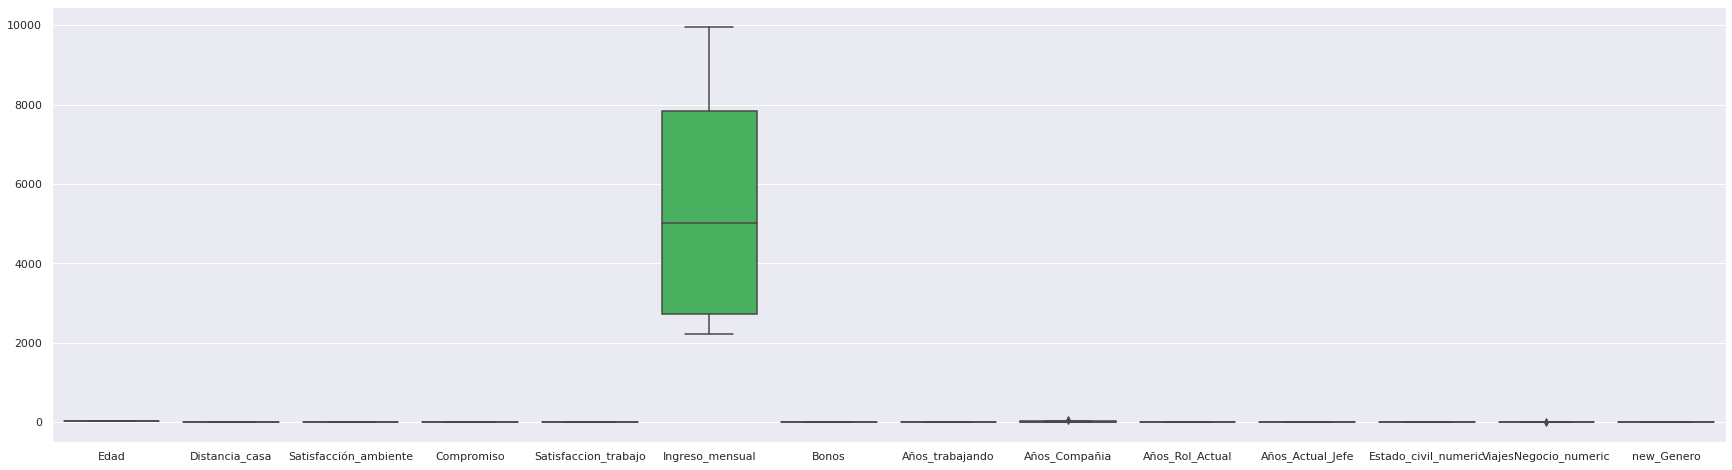

In [ ]:
#Visualización de todas las variables numéricas
fig=plt.figure(figsize=(30,8))
ax = sns.boxplot(data=datos_t, orient="v")

In [ ]:
datos_t.shape

(4, 14)

**Muestre un subconjunto de los datos luego del pre-procesamiento, para ilustrar cómo quedan los datos que utilizará para aplicar los algoritmos de aprendizaje.**

In [ ]:
datos_t.sample(4)

,Edad,Distancia_casa,Satisfacción_ambiente,Compromiso,Satisfaccion_trabajo,Ingreso_mensual,Bonos,Años_trabajando,Años_Compañia,Años_Rol_Actual,Años_Actual_Jefe,Estado_civil_numeric,ViajesNegocio_numeric,new_Genero
0,31,3,1,3,4,2211,1,2,3,1,3,2,0,0
5,30,15,3,2,1,7140,1,12,7,7,7,2,0,0
2,24,7,5,3,3,2886,1,6,60,3,2,1,1,0
1,40,8,1,2,4,9958,1,11,8,8,4,1,0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2bf0dbd910>,
      dtype=object)

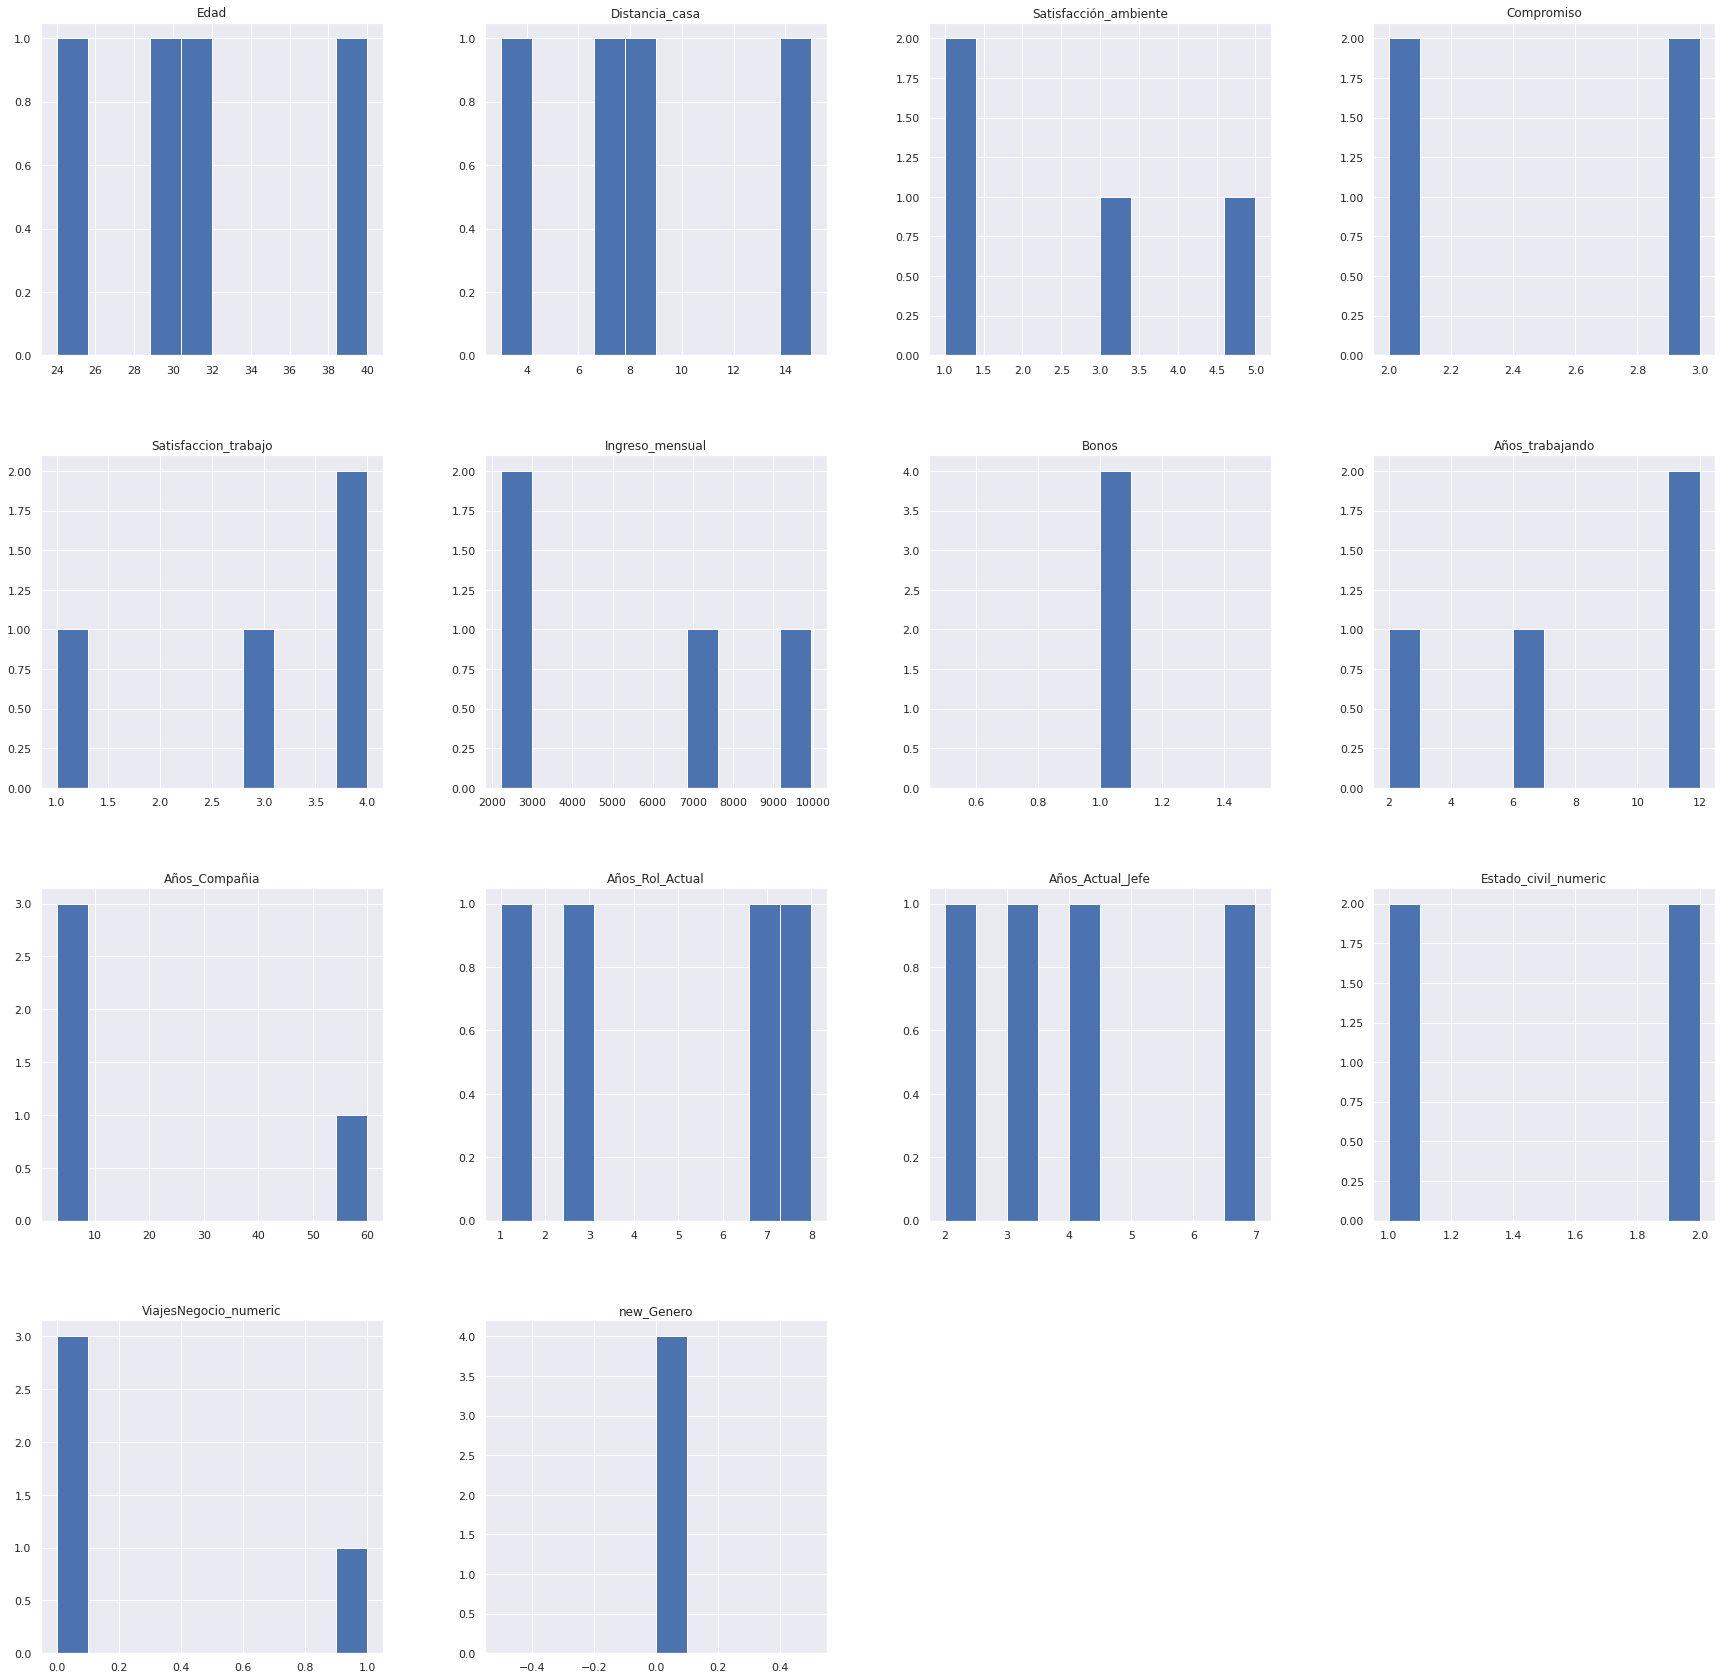

In [ ]:
# Se visualizan los histogramas
datos_t.hist(figsize = (30,30))

####Revisión de correlación

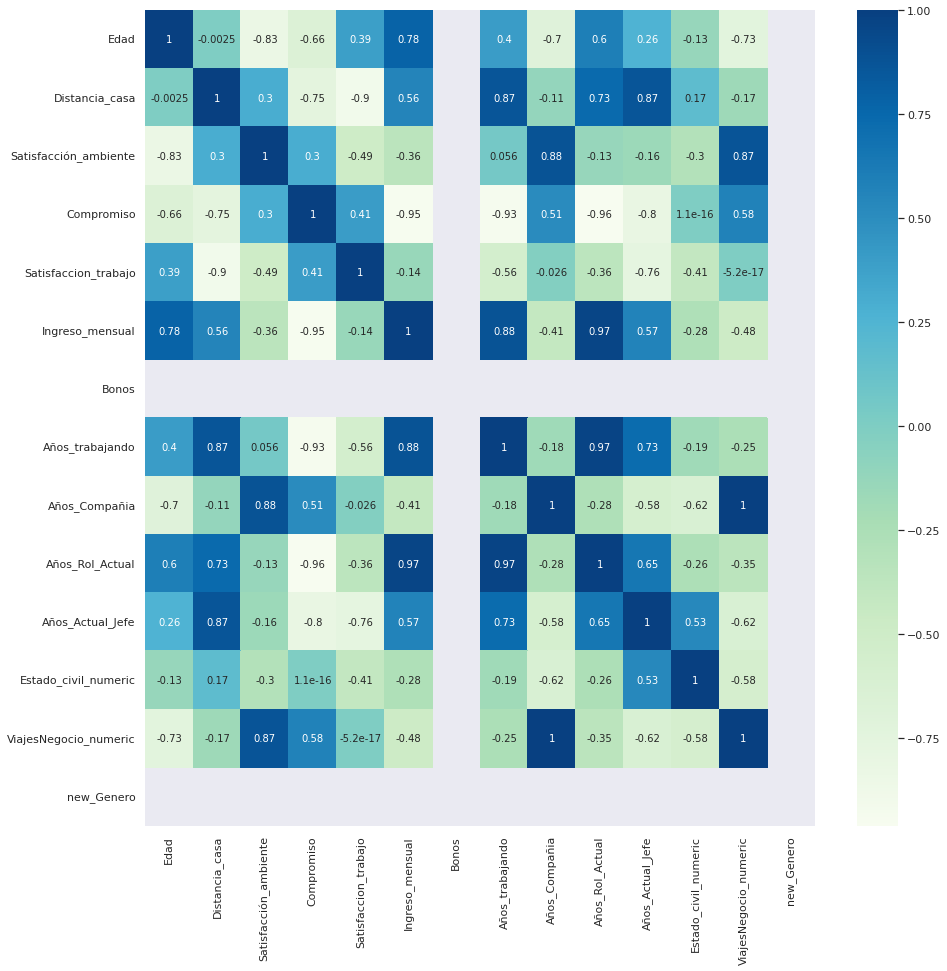

In [ ]:
# ¿Hay correlación entre variables?
plt.figure(figsize =(15,15))
correlacion = datos_t.corr()
sns.heatmap(correlacion, cmap = 'GnBu', annot = True)